In [1]:
import random
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker  
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import grangercausalitytests
import holoviews as hv
from holoviews import opts
import hvplot.pandas


In [2]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [3]:
df = pd.read_csv('filtered_data.csv', index_col=0)

In [48]:
df.describe([0.1,0.25,0.5,0.75,0.9])

LCLid    energy_sum  energy_median   energy_mean    energy_std  \
count  1.562418e+06  1.562418e+06   1.562418e+06  1.562418e+06  1.562418e+06   
mean   2.639057e+03  8.810907e+00   1.350583e-01  1.835841e-01  1.566010e-01   
std    1.810663e+03  6.183378e+00   1.082583e-01  1.288345e-01  1.318091e-01   
min    3.000000e+00  0.000000e+00   0.000000e+00  0.000000e+00  0.000000e+00   
10%    3.740000e+02  2.806000e+00   3.950000e-02  5.845833e-02  3.610975e-02   
25%    1.059000e+03  4.513000e+00   6.400000e-02  9.402083e-02  6.611676e-02   
50%    2.142500e+03  7.354000e+00   1.075000e-01  1.532292e-01  1.235731e-01   
75%    4.516000e+03  1.145100e+01   1.745000e-01  2.385833e-01  2.089028e-01   
90%    5.186000e+03  1.657800e+01   2.600000e-01  3.454375e-01  3.155650e-01   
max    5.562000e+03  9.651900e+01   2.327500e+00  2.010812e+00  2.071246e+00   

         energy_min    energy_max  temperatureMin  temperatureMax  \
count  1.562418e+06  1.562418e+06    1.562418e+06    1.562418e+06   
mean   4.879146e-02  7.670010e-01    7.894349e+00    1.412629e+01   
std    4.908628e-02  5.899613e-01    5.151586e+00    6.618811e+00   
min    0.000000e+00  0.000000e+00   -3.860000e+00   -6.000000e-02   
10%    9.000000e-03  1.850000e-01    1.160000e+00    6.110000e+00   
25%    1.900000e-02  3.310000e-01    3.520000e+00    9.250000e+00   
50%    3.600000e-02  6.430000e-01    7.610000e+00    1.314000e+01   
75%    6.400000e-02  1.042000e+00    1.223000e+01    1.884000e+01   
90%    1.010000e-01  1.516000e+00    1.497000e+01    2.298000e+01   
max    1.509000e+00  9.257000e+00    2.054000e+01    3.240000e+01   

           humidity  ...  StdDevEnergy  temperatureMin_st  energy_sum_st  \
count  1.562418e+06  ...  1.562418e+06       1.562418e+06   1.562418e+06   
mean   7.812685e-01  ...  3.147705e+00       3.006287e-03  -1.043159e-01   
std    9.734978e-02  ...  2.473918e+00       9.980747e-01   7.969542e-01   
min    4.300000e-01  ...  0.000000e+00      -2.274296e+00  -1.239923e+00   
10%    6.400000e-01  ...  9.910350e-01      -1.301715e+00  -8.782676e-01   
25%    7.100000e-01  ...  1.504818e+00      -8.444856e-01  -6.582583e-01   
50%    7.900000e-01  ...  2.469280e+00      -5.208389e-02  -2.920916e-01   
75%    8.600000e-01  ...  3.913023e+00       8.430007e-01   2.359566e-01   
90%    9.000000e-01  ...  6.267818e+00       1.373852e+00   8.967579e-01   
max    9.800000e-01  ...  1.926629e+01       2.452990e+00   1.120008e+01   

       temperature_avg  temperature_avg_st           ToU   day_of_week  \
count     1.562418e+06        1.562418e+06  1.562418e+06  1.562418e+06   
mean      1.101032e+01        2.656873e-03  2.163947e-01  2.995058e+00   
std       5.749746e+00        9.986772e-01  4.117865e-01  2.001230e+00   
min      -1.190000e+00       -2.116425e+00  0.000000e+00  0.000000e+00   
10%       3.735000e+00       -1.260999e+00  0.000000e+00  0.000000e+00   
25%       6.525000e+00       -7.764016e-01  0.000000e+00  1.000000e+00   
50%       1.042500e+01       -9.900797e-02  0.000000e+00  3.000000e+00   
75%       1.563000e+01        8.050520e-01  0.000000e+00  5.000000e+00   
90%       1.888500e+01        1.370415e+00  1.000000e+00  6.000000e+00   
max       2.520000e+01        2.467272e+00  1.000000e+00  6.000000e+00   

       month_of_year  energy_sum_MA_st  days_from_start  
count   1.562418e+06      1.562418e+06     1.562418e+06  
mean    6.942339e+00     -1.106456e-01     3.030000e+02  
std     3.606462e+00      7.810100e-01     1.752256e+02  
min     1.000000e+00     -1.316919e+00     0.000000e+00  
10%     1.000000e+00     -8.893801e-01     6.000000e+01  
25%     4.000000e+00     -6.652179e-01     1.510000e+02  
50%     8.000000e+00     -2.858470e-01     3.030000e+02  
75%     1.000000e+01      2.463450e-01     4.550000e+02  
90%     1.200000e+01      8.869482e-01     5.460000e+02  
max     1.200000e+01      8.351297e+00     6.060000e+02  

[10 rows x 24 columns]

In [10]:
statistics = df[['LCLid','energy_sum', 'temperature_avg','dewPoint','days_from_start']]

In [177]:
statistics.drop(['LCLid','days_from_start'], axis =1).describe([.1,.25, .5, .75,.9]).round(2)

energy_sum  temperature_avg    dewPoint
count  1562418.00       1562418.00  1562418.00
mean         8.81            11.01        6.98
std          6.18             5.75        5.05
min          0.00            -1.19       -5.54
10%          2.81             3.74        0.38
25%          4.51             6.52        3.22
50%          7.35            10.42        7.08
75%         11.45            15.63       10.87
90%         16.58            18.89       13.64
max         96.52            25.20       17.77

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1562418 entries, 0 to 1627366
Data columns (total 29 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   LCLid               1562418 non-null  int64  
 1   day                 1562418 non-null  object 
 2   energy_sum          1562418 non-null  float64
 3   energy_median       1562418 non-null  float64
 4   energy_mean         1562418 non-null  float64
 5   energy_std          1562418 non-null  float64
 6   energy_min          1562418 non-null  float64
 7   energy_max          1562418 non-null  float64
 8   stdorToU            1562418 non-null  object 
 9   Acorn               1562418 non-null  object 
 10  Acorn_grouped       1562418 non-null  object 
 11  temperatureMin      1562418 non-null  float64
 12  temperatureMax      1562418 non-null  float64
 13  humidity            1562418 non-null  float64
 14  dewPoint            1562418 non-null  float64
 15  holiday             

In [4]:
df.columns

Index(['LCLid', 'day', 'energy_sum', 'energy_median', 'energy_mean',
       'energy_std', 'energy_min', 'energy_max', 'stdorToU', 'Acorn',
       'Acorn_grouped', 'temperatureMin', 'temperatureMax', 'humidity',
       'dewPoint', 'holiday', 'energy_sum_MA', 'AverageEnergy', 'StdDevEnergy',
       'EnergyClass', 'temperatureMin_st', 'energy_sum_st', 'temperature_avg',
       'temperature_avg_st', 'ToU', 'day_of_week', 'month_of_year',
       'energy_sum_MA_st', 'days_from_start'],
      dtype='object')

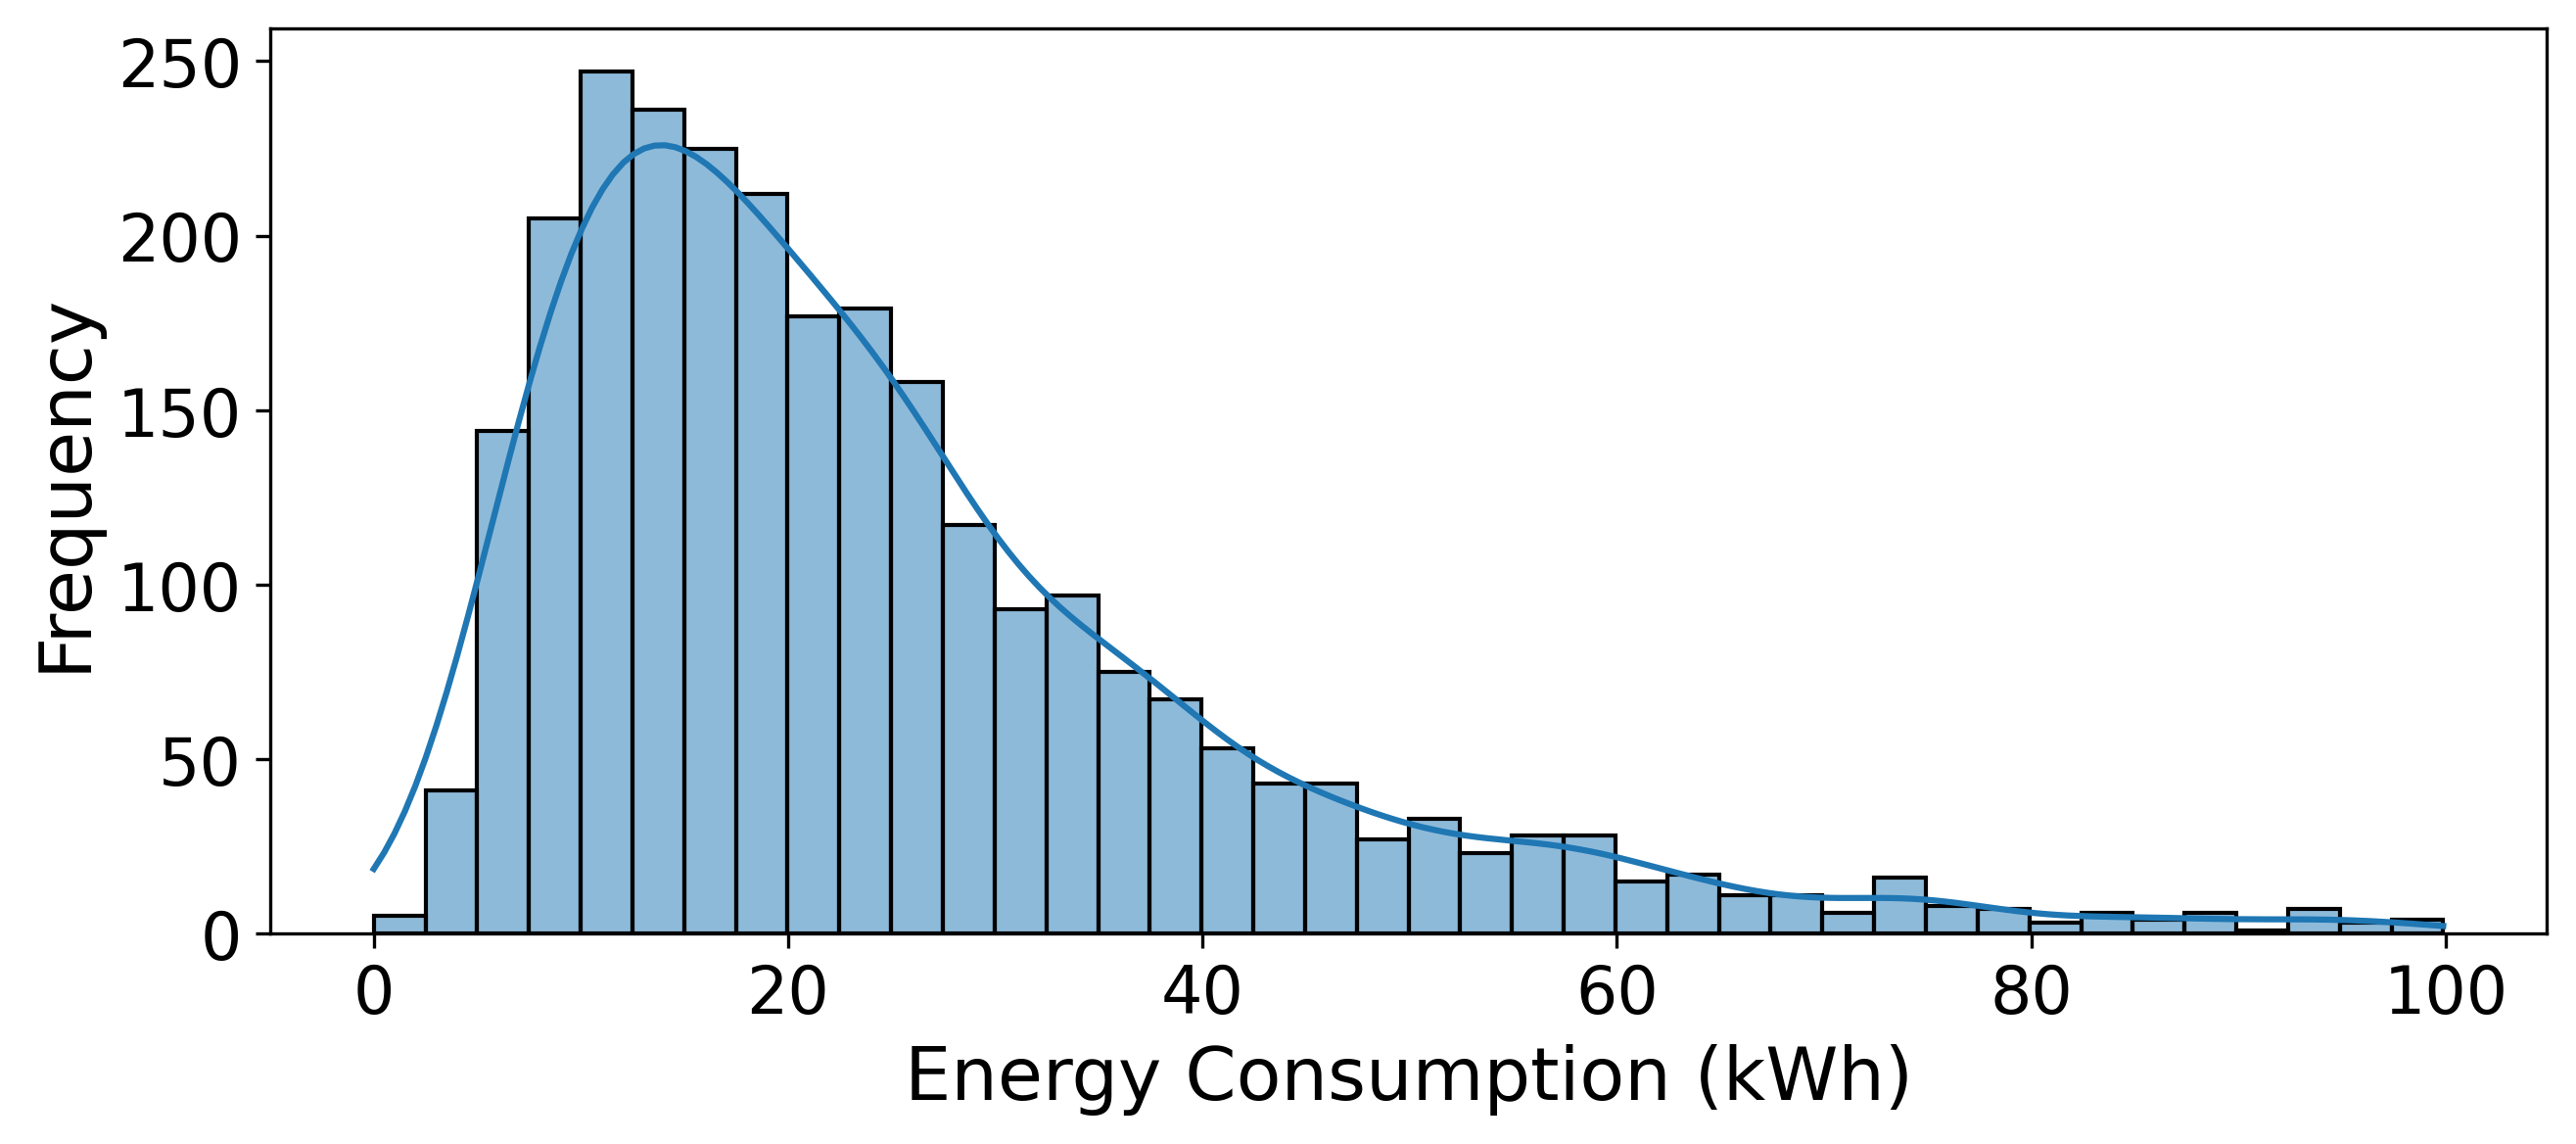

In [7]:
df_agg = df.groupby('LCLid')['energy_sum'].agg('mean').reset_index()

# Plot histogram of energy consumption data
plt.figure(figsize=(10, 4))
sns.histplot(df_agg['energy_sum'], bins=40, kde=True, color='tab:blue')
# plt.title('Distribution of Average Energy Consumption')
plt.xlabel('Energy Consumption (kWh)', fontsize = 18)
plt.ylabel('Frequency', fontsize = 18)
# Set the size of the tick labels
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tick_params(axis='both', which='minor', labelsize=16)
plt.savefig('energy_dist.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

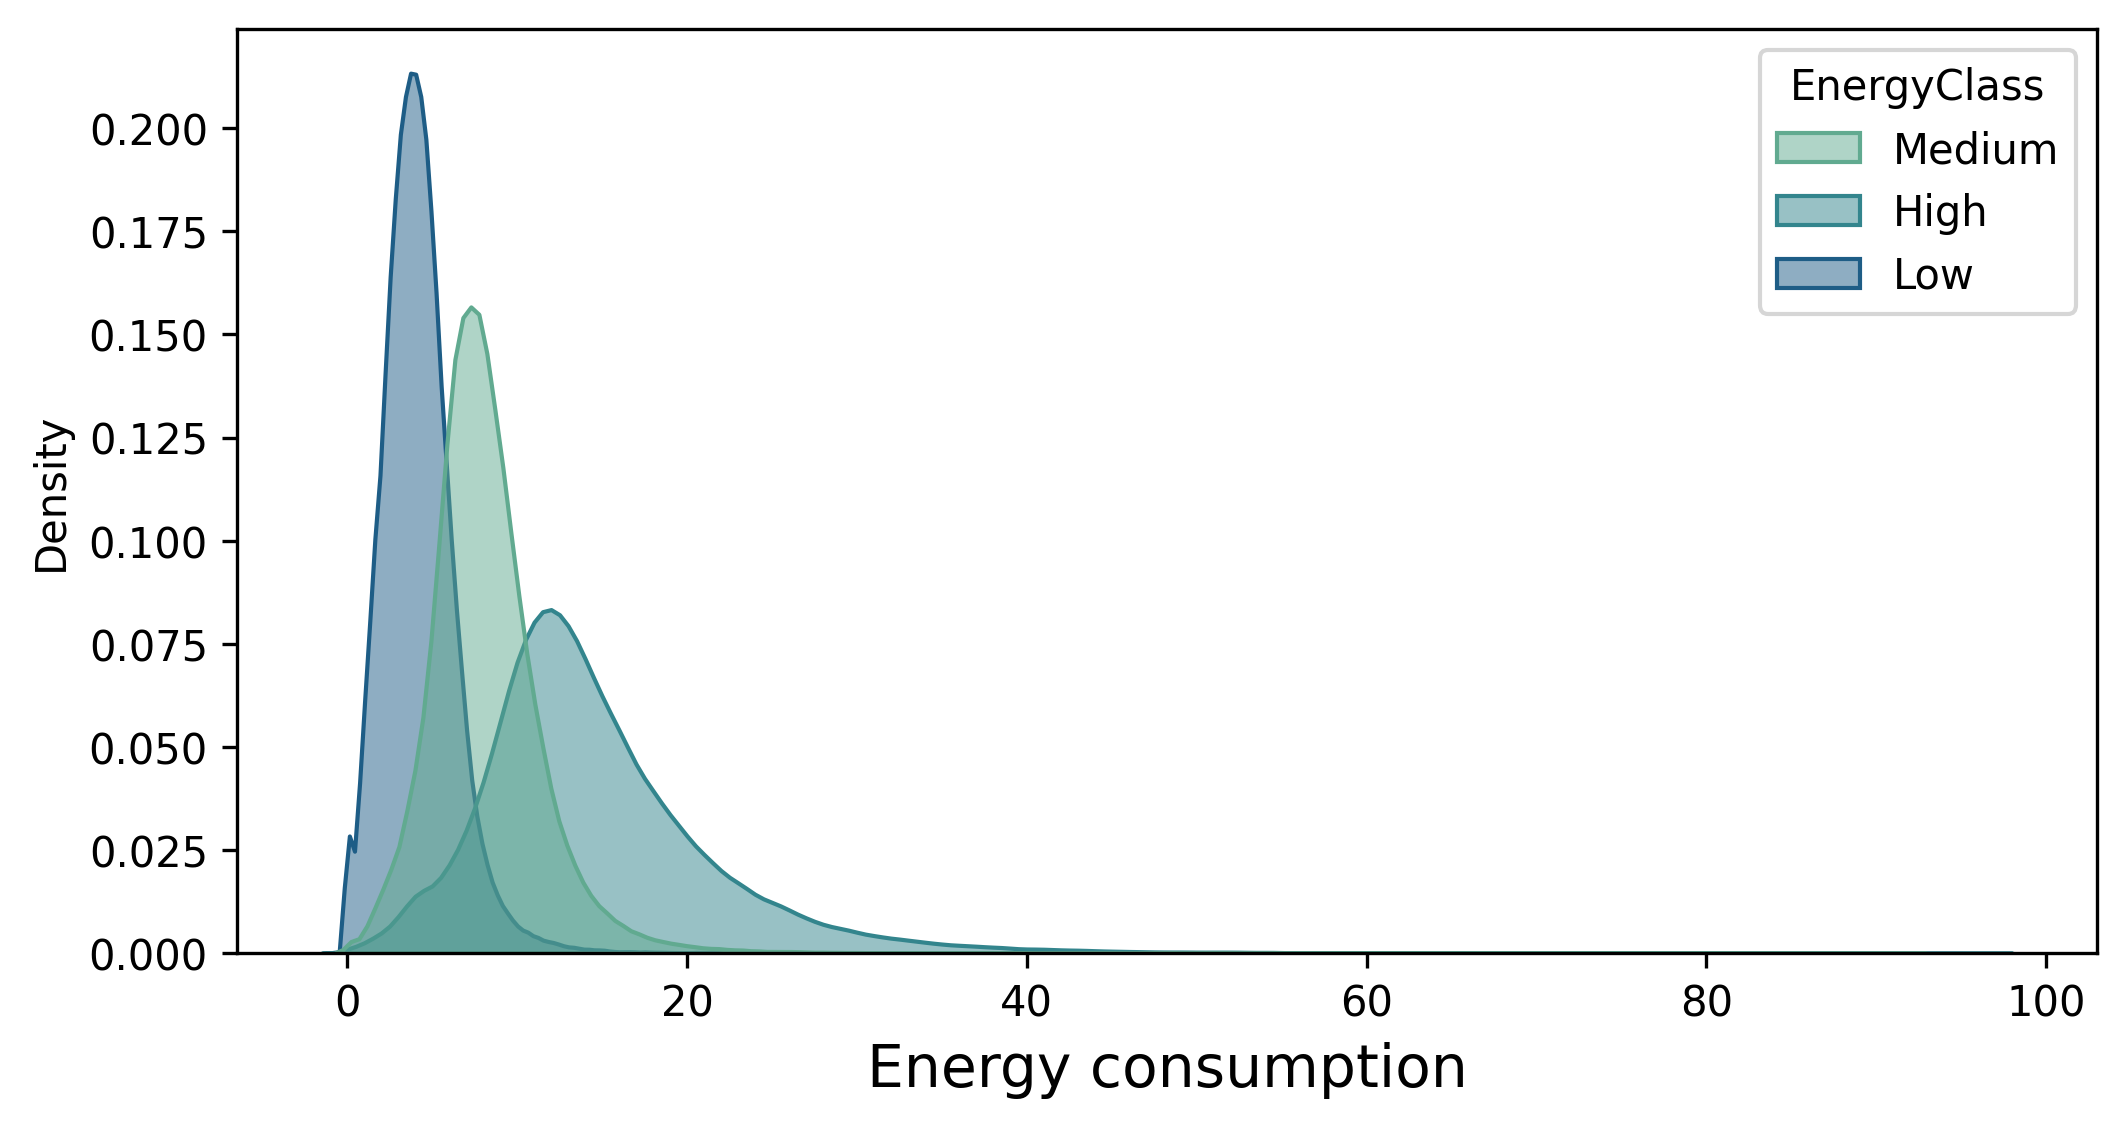

In [21]:
# numerical_cols = ['energy_sum','dewPoint']
plt.figure(figsize=(8,4))
sns.kdeplot(
   data=df, x='energy_sum', hue="EnergyClass",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=1
)
plt.xlabel('Energy consumption',  fontsize = 14)
plt.savefig('energyclass_dist.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.grid(False)

In [6]:
df['day'] = pd.to_datetime(df['day']).dt.date

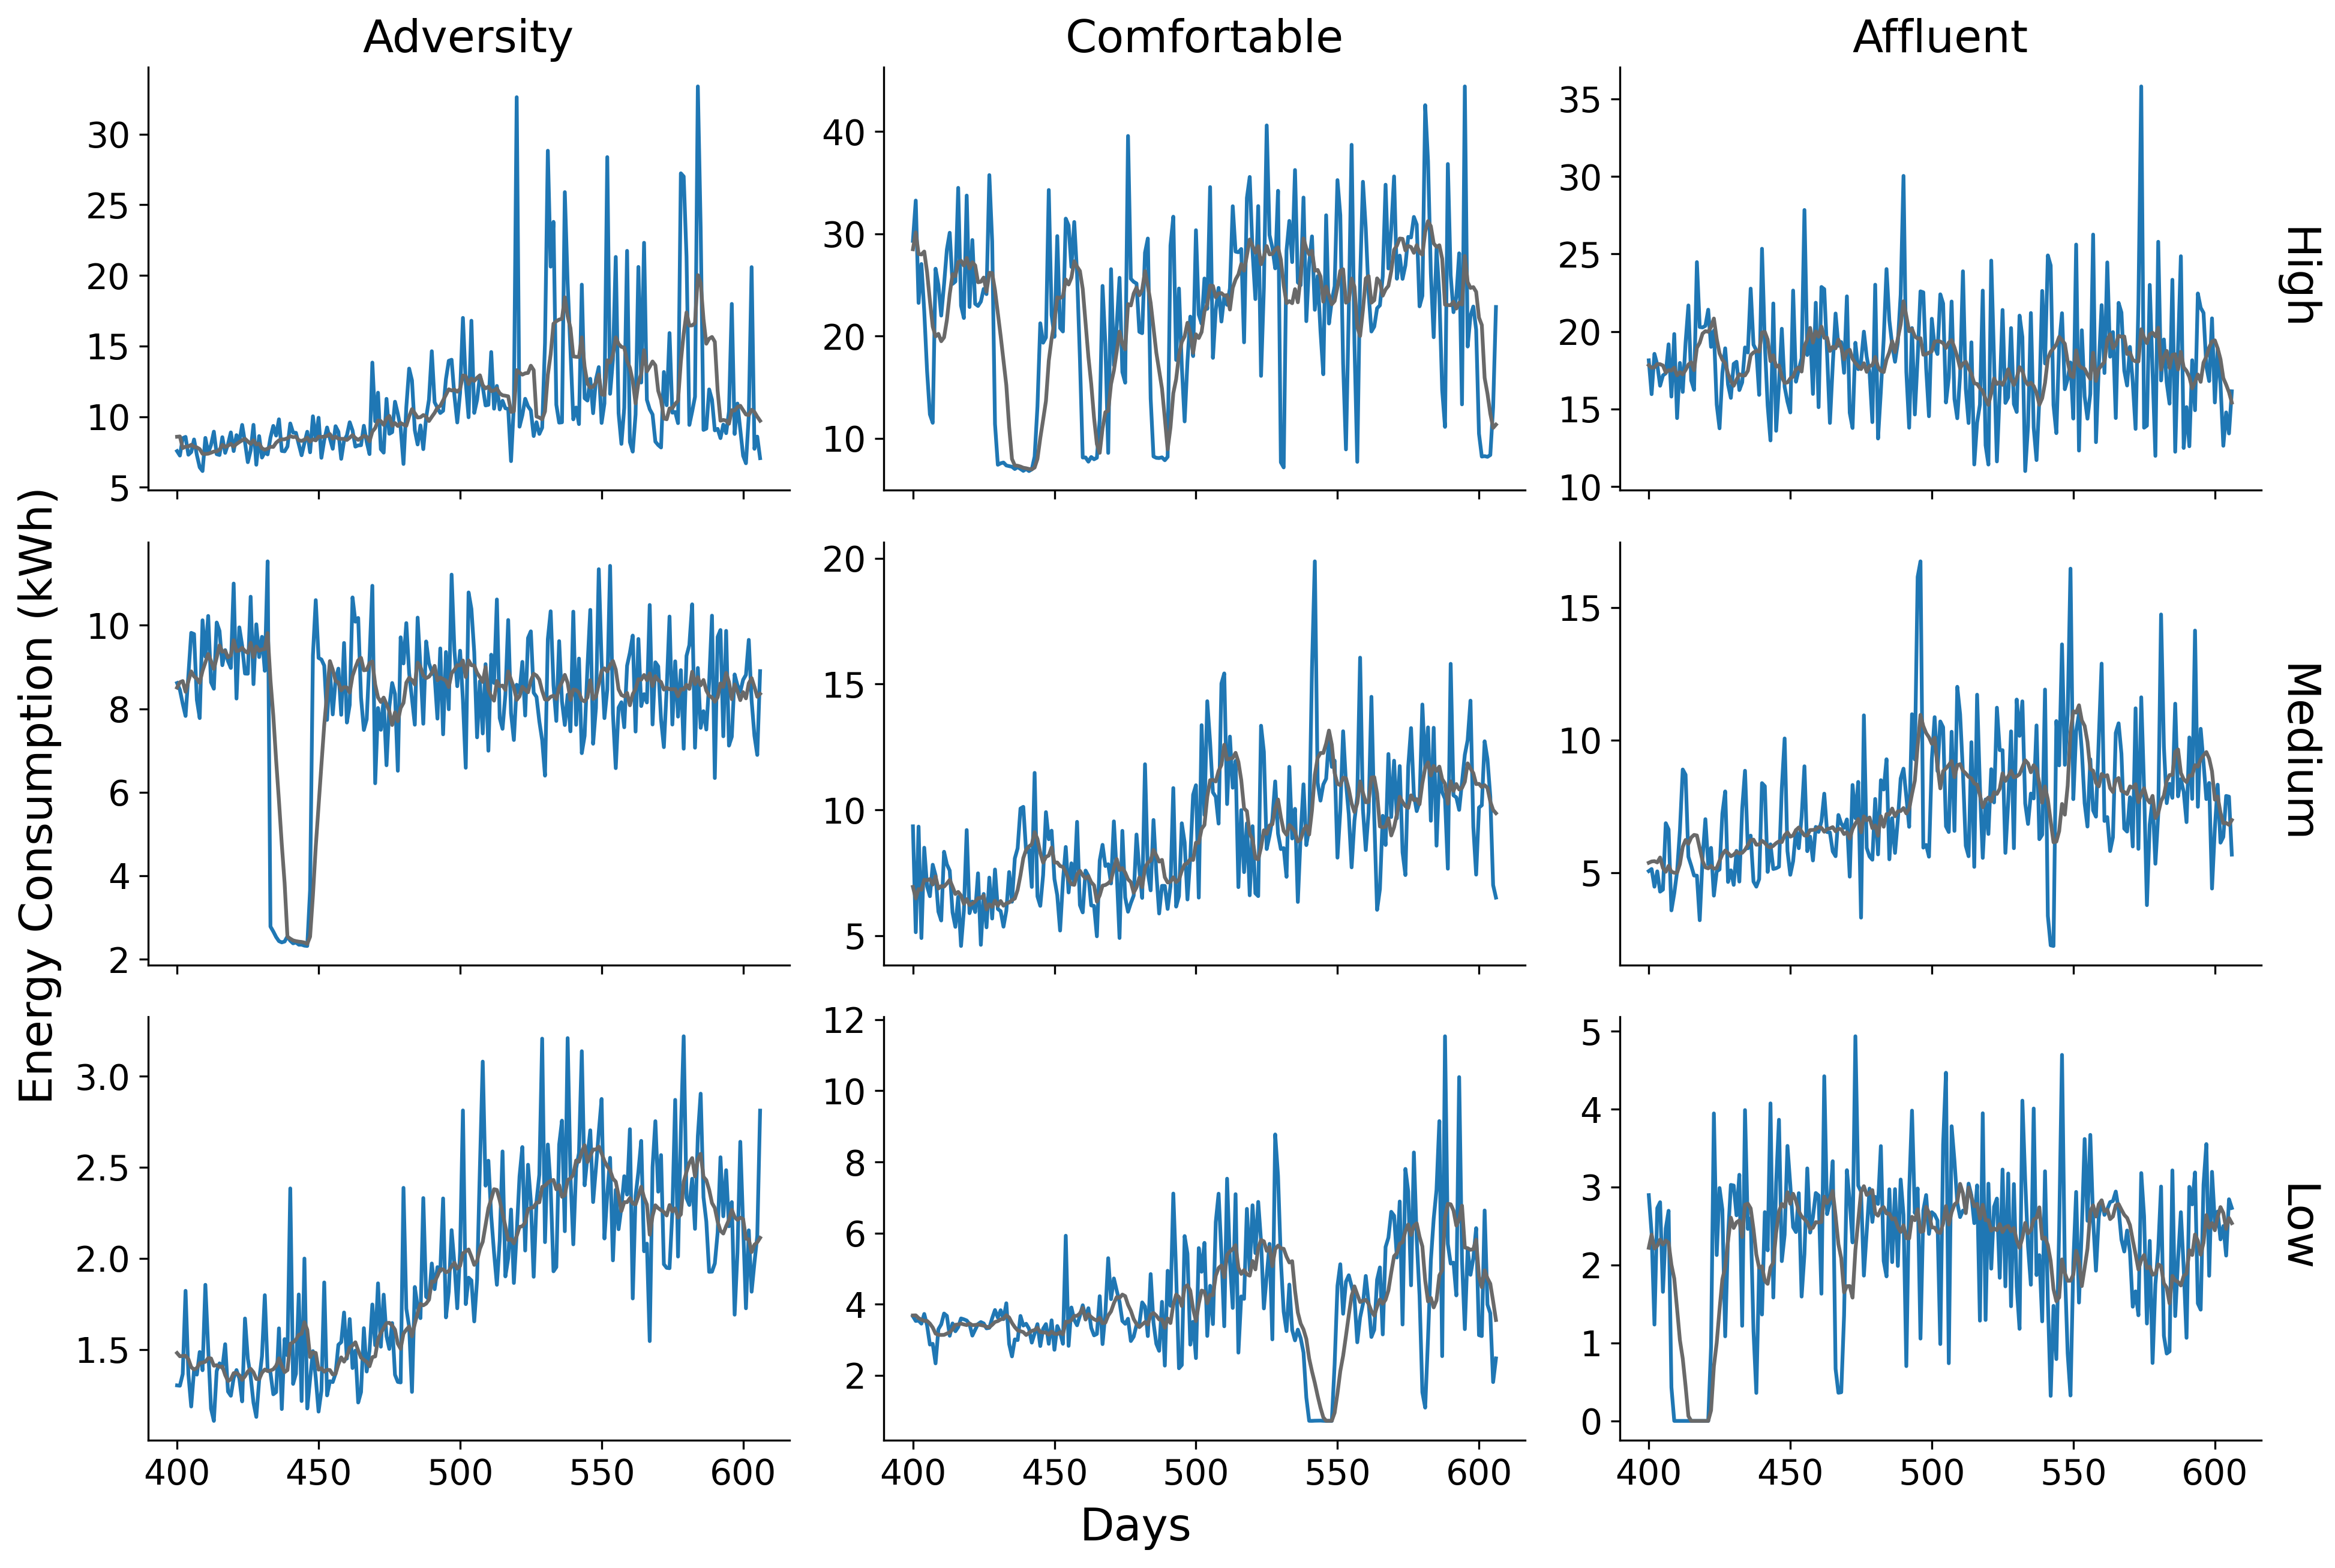

In [18]:

# Define the days range you are interested in
start_day = 400  
end_day = 607  

# Sample one LCLid from each combination of EnergyClass and Acorn_grouped
sampled_ids = df.groupby(['EnergyClass', 'Acorn_grouped'])['LCLid'].apply(lambda x: x.sample(1, random_state = 74)).reset_index()

# Filter the original DataFrame to get all data for these LCLid's within the specified days range
filtered_data = df[(df['LCLid'].isin(sampled_ids['LCLid'])) & (df['days_from_start'] >= start_day) & (df['days_from_start'] <= end_day)]

# Create the FacetGrid with hue set to 'Acorn_grouped'
acorn_order = ['Adversity', 'Comfortable', 'Affluent']
energy_class_order = ['High', 'Medium', 'Low']
g = sns.FacetGrid(filtered_data, col='Acorn_grouped', row='EnergyClass', sharey=False,
                  margin_titles=True, height=3, aspect=1.5, col_order=acorn_order, row_order=energy_class_order)

g.map_dataframe(sns.lineplot, x='days_from_start', y='energy_sum')
g.map_dataframe(sns.lineplot, x='days_from_start', y='energy_sum_MA', color='dimgray')

# Remove individual axis labels
g.set_axis_labels("", "")

# Add a single x-axis and y-axis label for the entire figure
g.fig.text(0.5, 0.04, 'Days', ha='center', fontsize=18)
g.fig.text(0.04, 0.5, 'Energy Consumption (kWh)', va='center', rotation='vertical', fontsize=18)

g.set_titles(col_template="{col_name}", row_template="{row_name}", size=18)

# Set tick labels font size
for ax in g.axes.flat:
    ax.tick_params(labelsize=14)

plt.tight_layout(rect=[0.05, 0.05, 1,1]) 
plt.savefig('facet_grid_09.pdf', format='pdf')
plt.show()


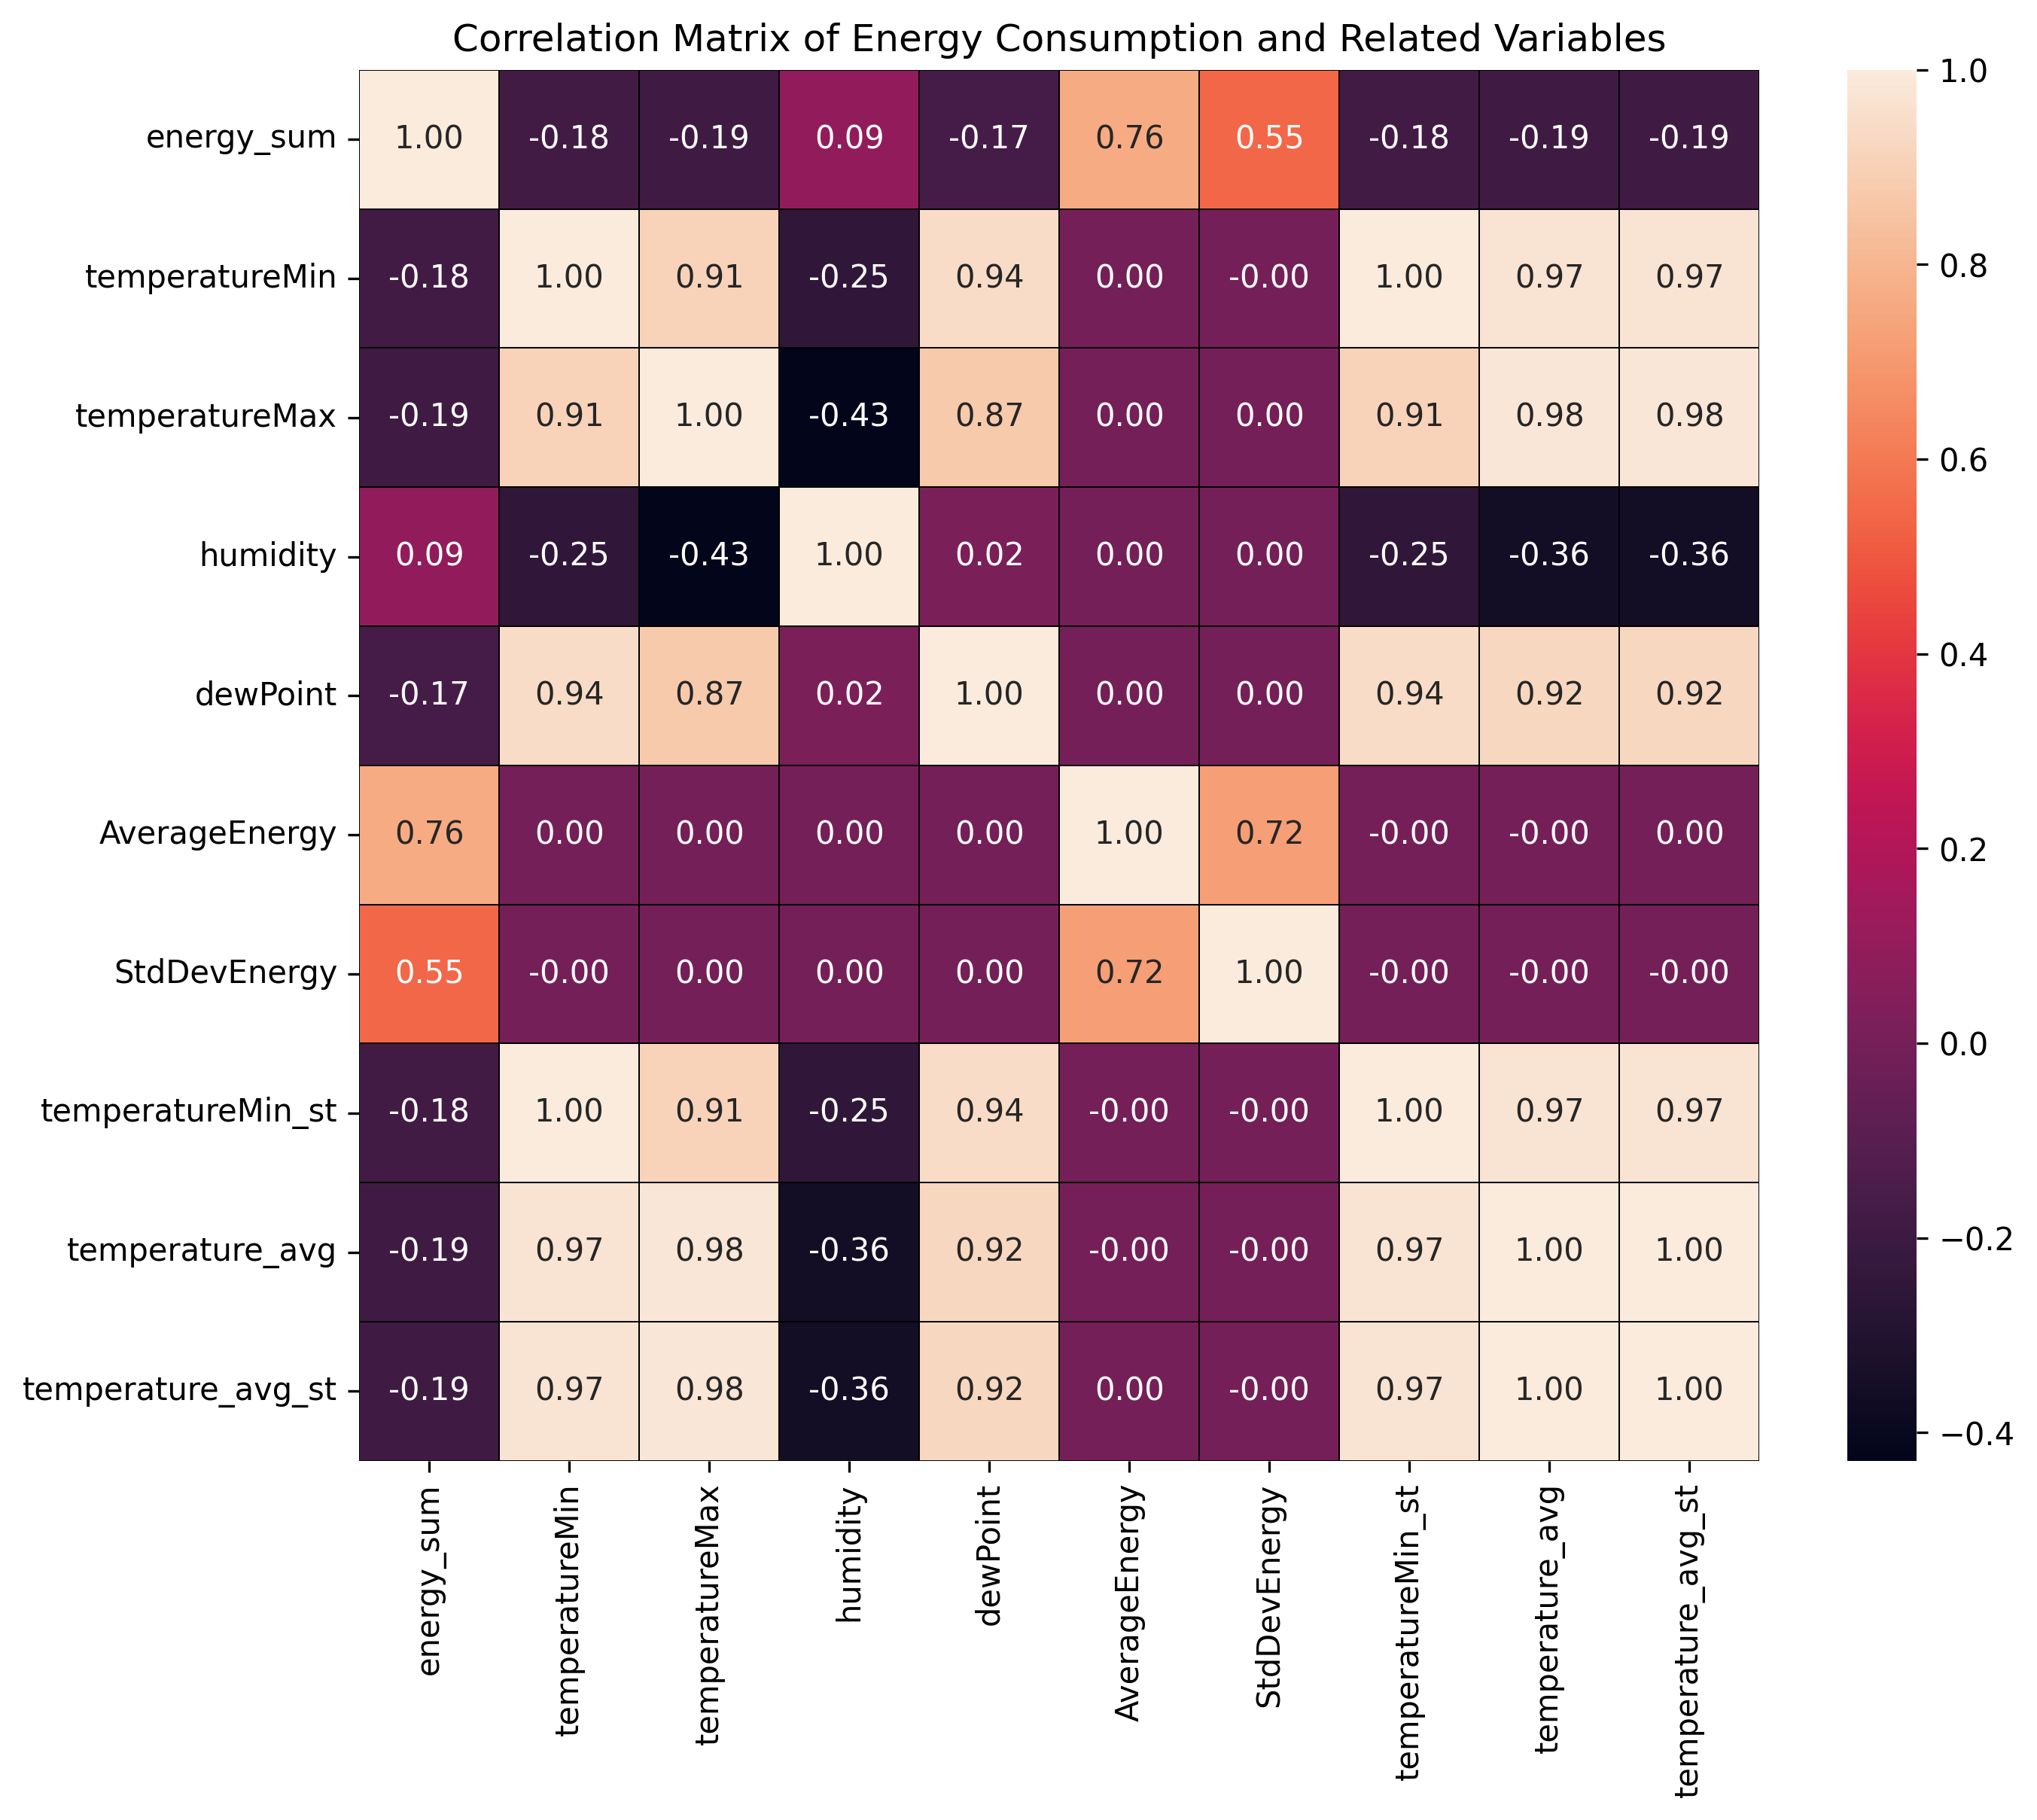

In [18]:

# Selecting only numerical columns for correlation analysis
numerical_cols = ['energy_sum','temperatureMin', 'temperatureMax', 'humidity',
       'dewPoint','AverageEnergy', 'StdDevEnergy','temperatureMin_st', 'temperature_avg',
       'temperature_avg_st']

# Calculate the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Creating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cbar=True, linecolor='black', linewidths=0.4, alpha = 1)
plt.title('Correlation Matrix of Energy Consumption and Related Variables')
plt.show()


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
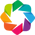

:Chord   [source,target]   (value)

In [17]:

# Ensure Holoviews extension is loaded
hv.extension('bokeh')

# Assuming df is defined and contains the necessary data
numerical_cols = ['energy_sum','temperatureMin', 'temperatureMax', 'humidity',
                  'dewPoint','AverageEnergy', 'StdDevEnergy','temperatureMin_st', 'temperature_avg',
                  'temperature_avg_st']

# Calculate the correlation matrix
corr_matrix = df[numerical_cols].corr().abs()  

# Filter the correlations based on the threshold
threshold = 0.5
corr_matrix_filtered = corr_matrix[corr_matrix >= threshold].stack().reset_index()
corr_matrix_filtered = corr_matrix_filtered[corr_matrix_filtered['level_0'] != corr_matrix_filtered['level_1']]
corr_matrix_filtered.columns = ['source', 'target', 'value']

# Create nodes DataFrame
nodes = pd.DataFrame(numerical_cols, columns=['name'])
nodes['index'] = nodes.index

# Map the source and target to the indices in the nodes DataFrame
corr_matrix_filtered['source'] = corr_matrix_filtered['source'].apply(lambda x: nodes.index[nodes['name'] == x][0])
corr_matrix_filtered['target'] = corr_matrix_filtered['target'].apply(lambda x: nodes.index[nodes['name'] == x][0])

# Create the chord diagram with labels
chord = hv.Chord((corr_matrix_filtered, hv.Dataset(nodes, 'index'))).select(value=(threshold, 1))

# Set options for the chord diagram
chord.opts(
    opts.Chord(
        labels='name',
        cmap='Category20',
        edge_cmap='viridis',
        edge_color='value',
        node_color='index',
        node_size=20,
        edge_line_width=2,
        title='Correlation Matrix Chord Diagram',
        width=1000,  
        height=1000, 
        fontsize={'labels': 20, 'title': 16, 'xticks': 14, 'yticks': 14}, 
        show_frame=True,
        toolbar='above',
        tools=['hover'],  
    )
)

# Display the chord diagram in the Jupyter notebook
hv.output(chord, backend='bokeh')

# Save the plot to an HTML file
hv.save(chord, 'chord_diagram.html', fmt='html')



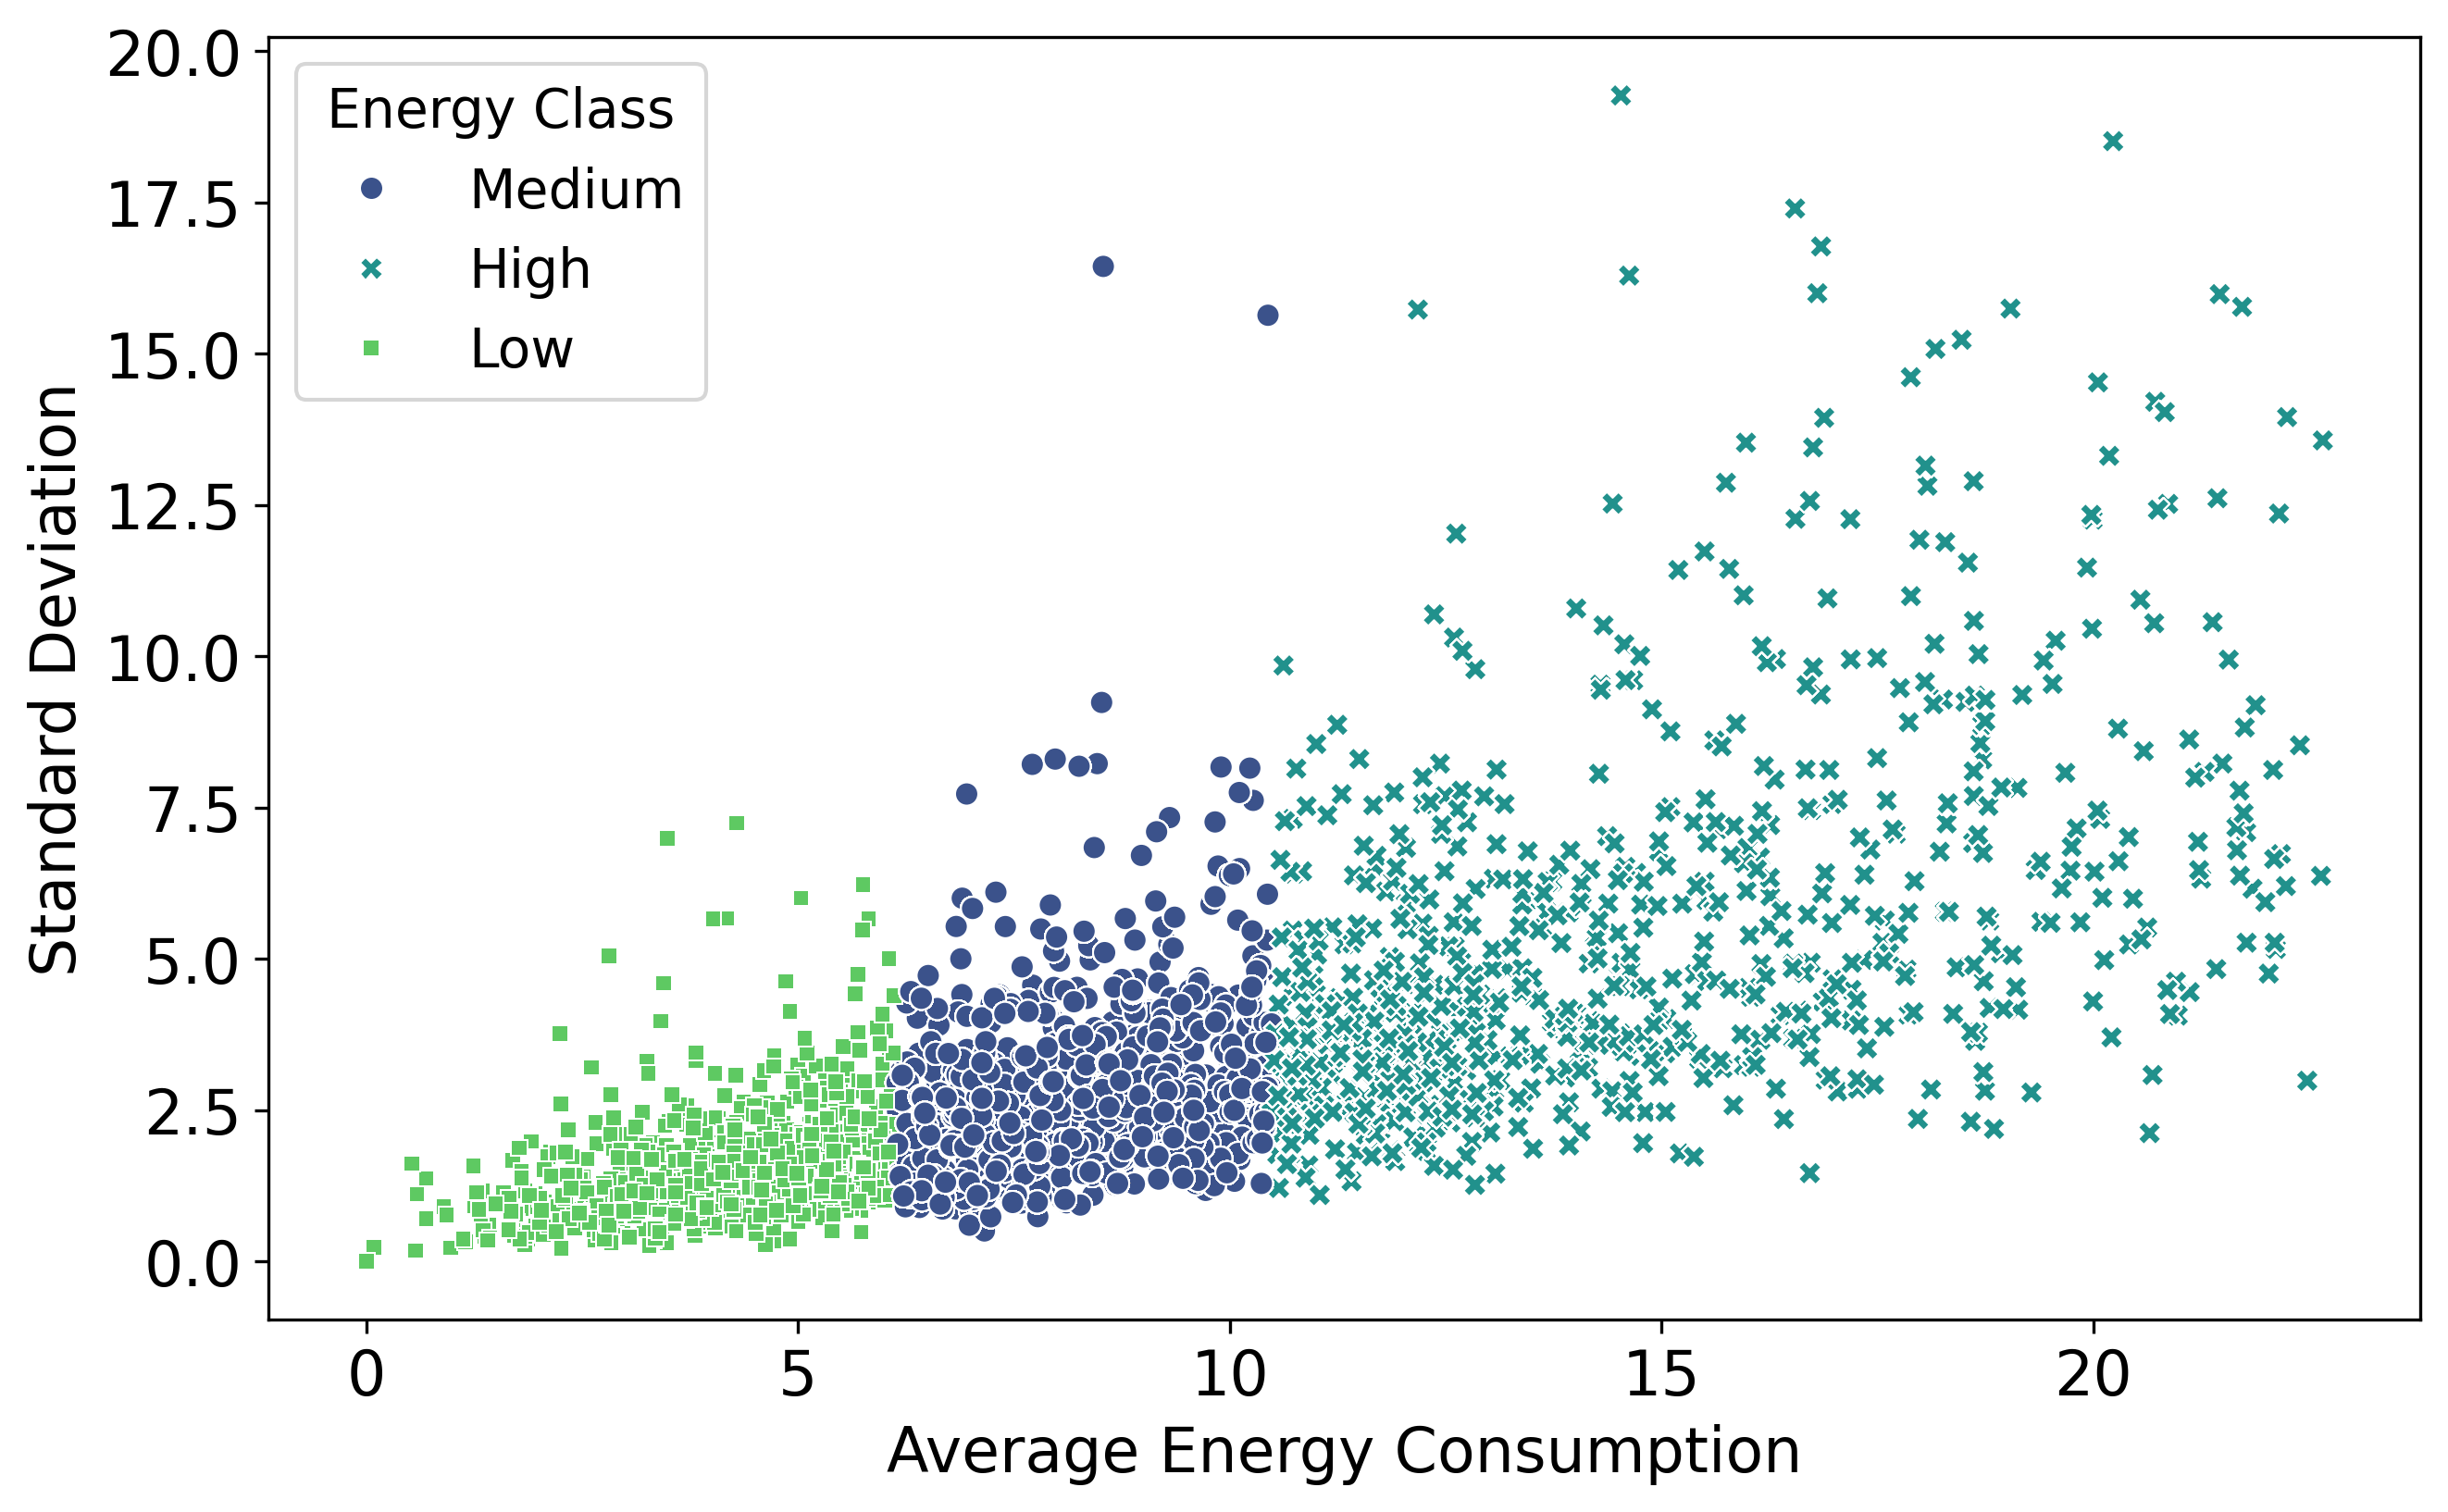

In [113]:

# Scatter plot of AverageEnergy vs StdDevEnergy
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AverageEnergy', y='StdDevEnergy', hue='EnergyClass', data=df, palette='viridis', style='EnergyClass')
# plt.title('Household Energy Consumption: Average vs. Variability')
plt.xlabel('Average Energy Consumption')
plt.ylabel('Standard Deviation')
plt.legend(title='Energy Class')
plt.savefig('Average_by_class.pdf', format='pdf')
plt.show()


/tmp/ipykernel_80493/1617694444.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Acorn', data=acorn_group_counts_sorted, palette='viridis')


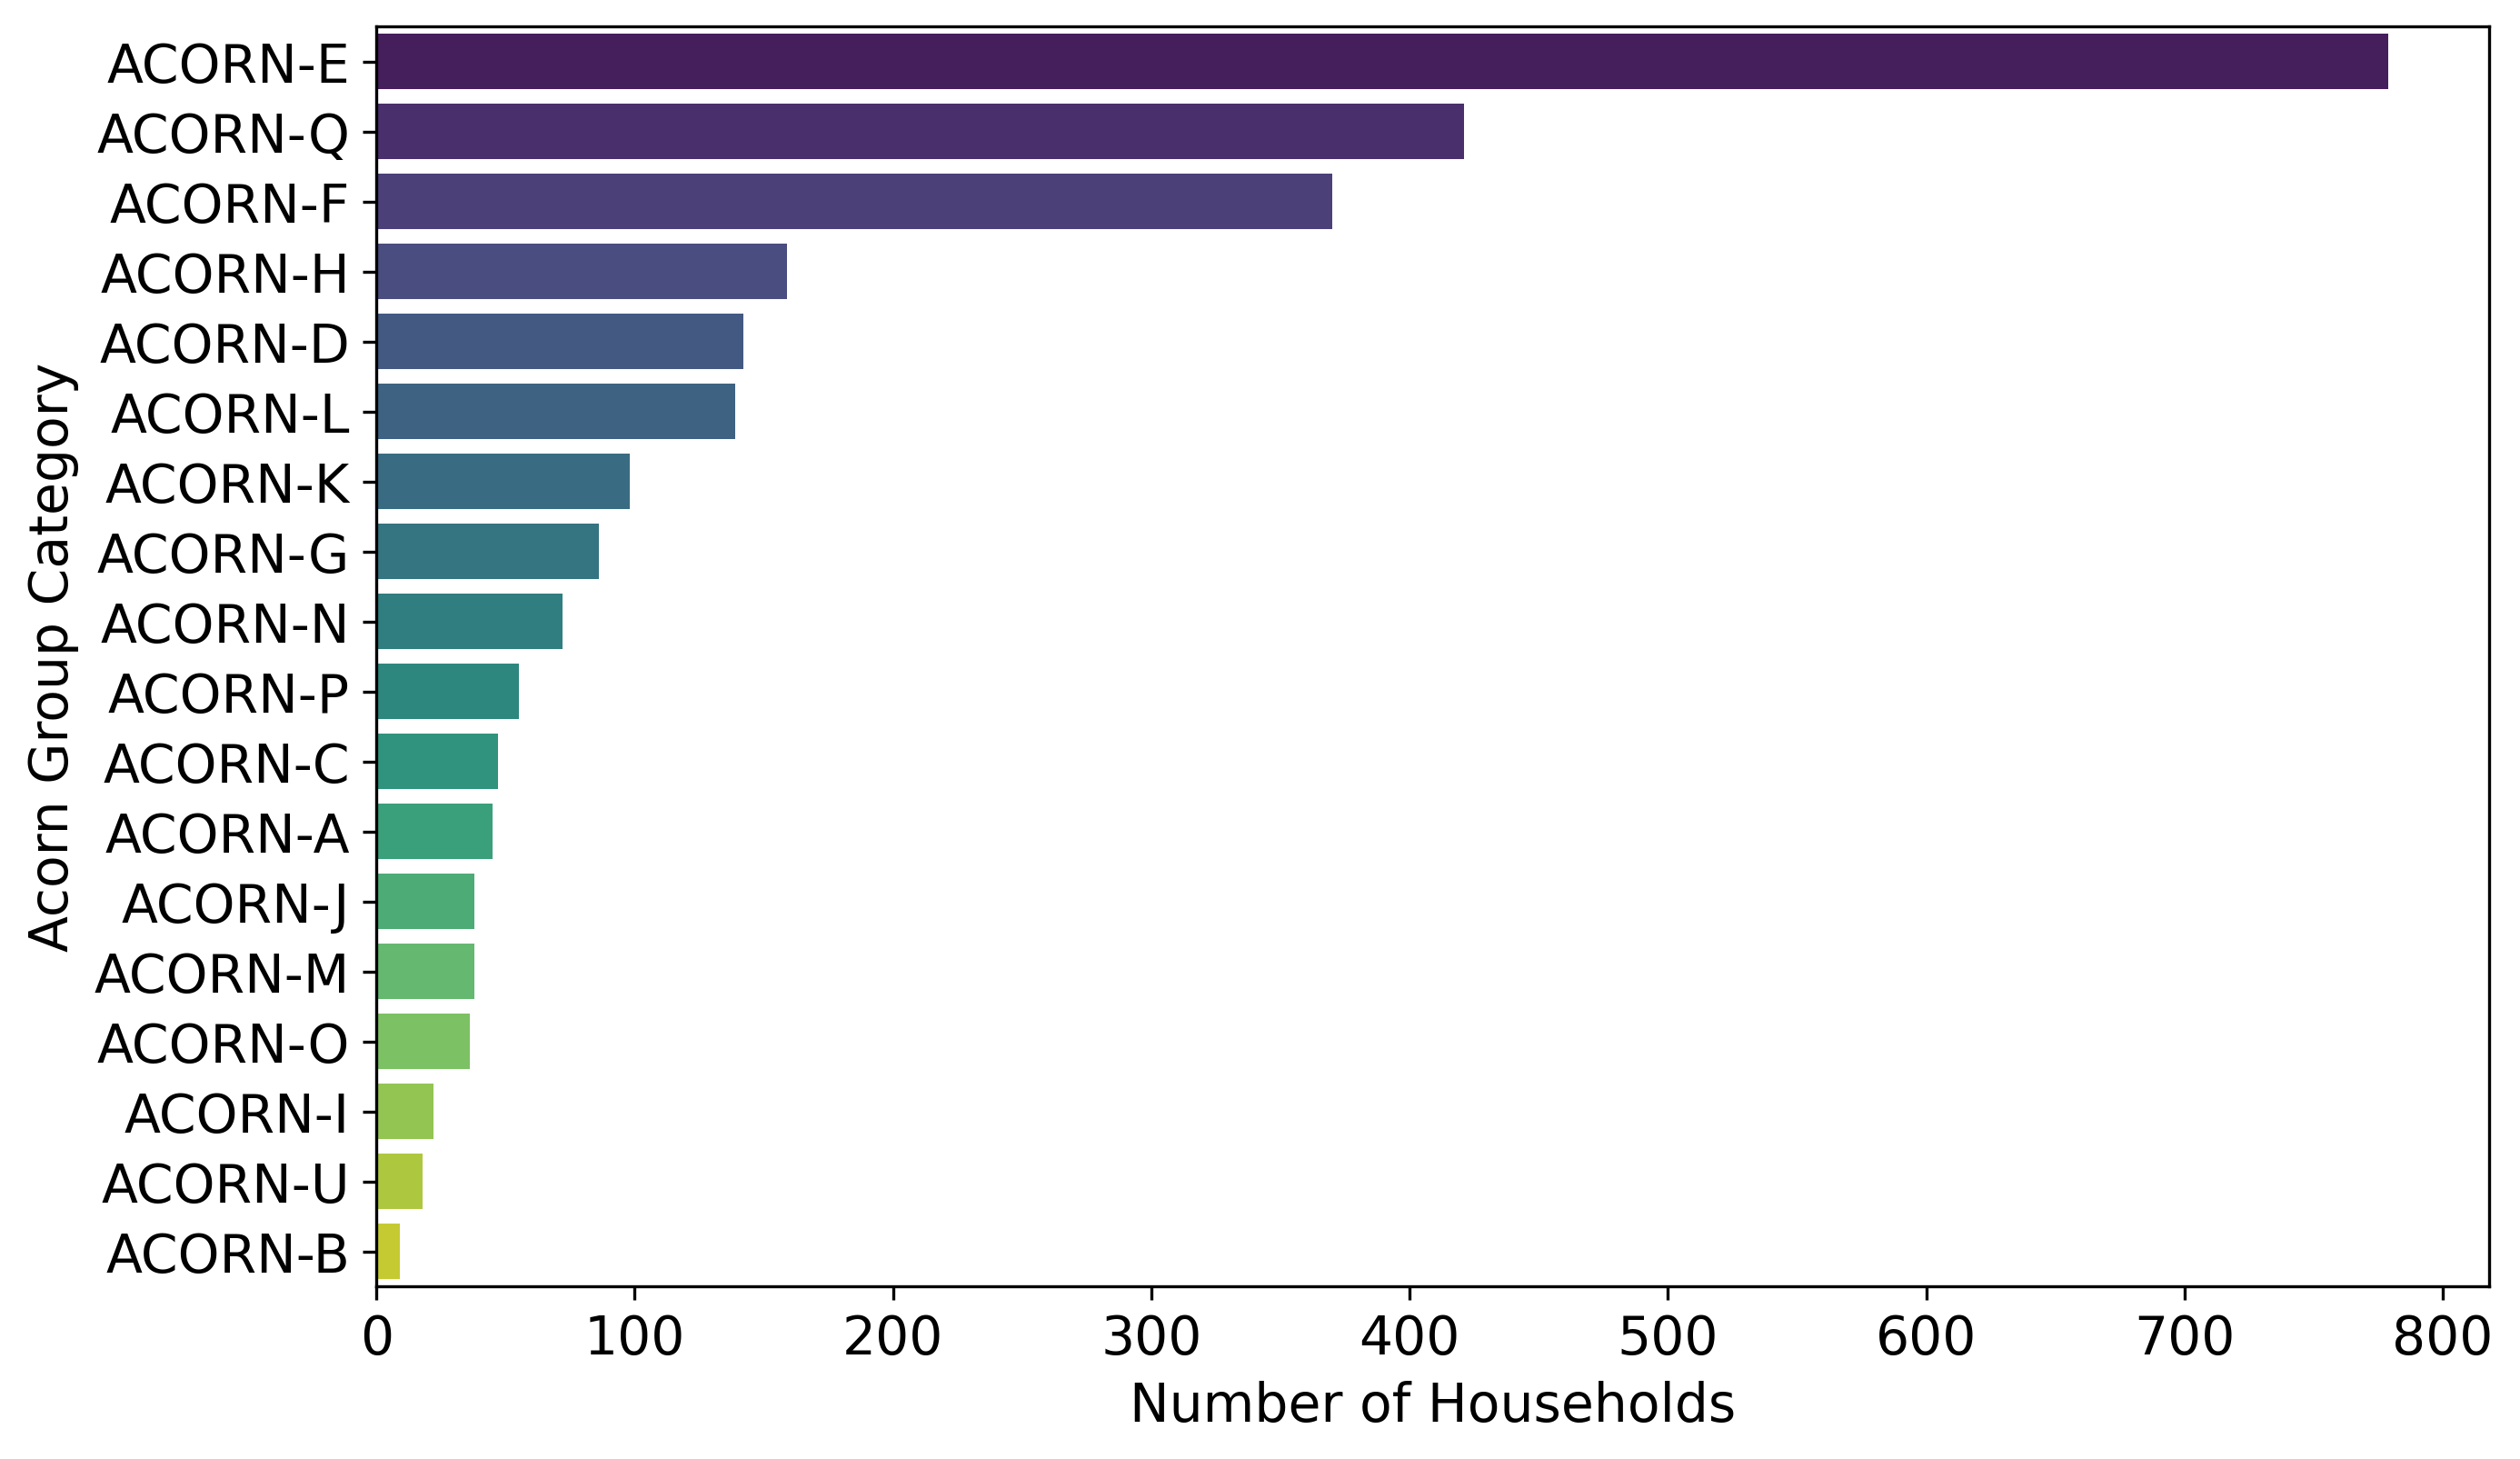

In [119]:
acorn_group_counts = df.groupby('Acorn')['LCLid'].nunique().reset_index(name='Count')
acorn_group_counts_sorted = acorn_group_counts.sort_values(by='Count', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Acorn', data=acorn_group_counts_sorted, palette='viridis')
# plt.title('Distribution of Acorn Categories')
plt.xlabel('Number of Households')
plt.ylabel('Acorn Group Category')
plt.show()

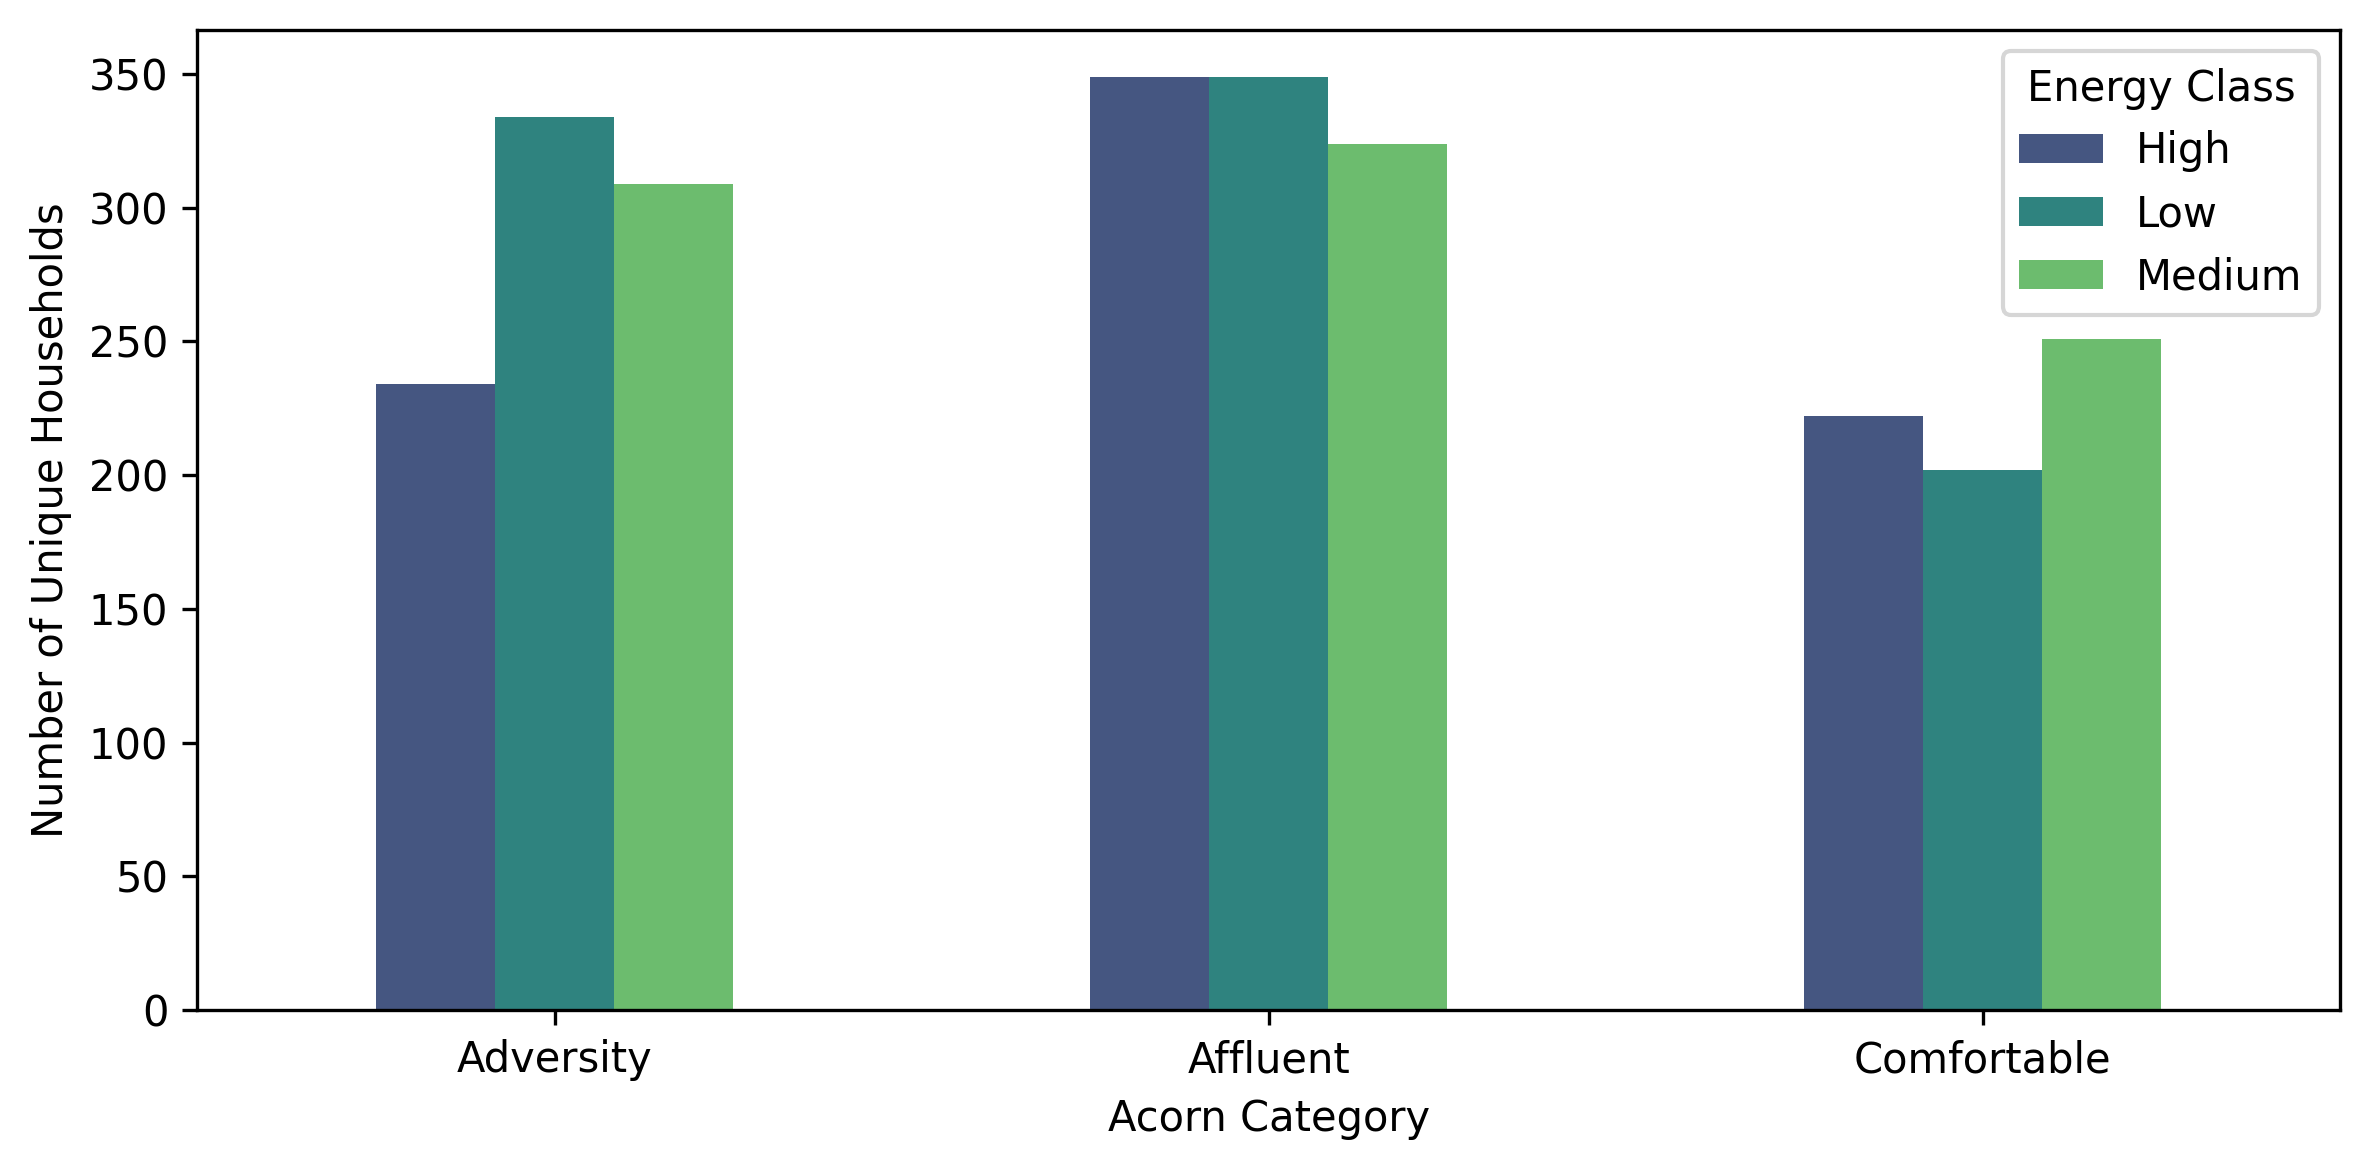

In [7]:

aggregated_data = (
    df.groupby(['Acorn_grouped', 'EnergyClass'])
    .agg(Unique_LCLids=('LCLid', 'nunique'))
    .reset_index()
)

plt.figure(figsize=(8, 4))
sns.barplot(
    x='Acorn_grouped', 
    y='Unique_LCLids', 
    hue='EnergyClass', 
    data=aggregated_data, 
    palette='viridis',
    width= 0.5,
    dodge='auto'
)
# plt.title('Distribution of Energy Consumption Classes by Acorn Category')
plt.xlabel('Acorn Category')
plt.ylabel('Number of Unique Households')
plt.xticks()
plt.legend(title='Energy Class')
plt.tight_layout()  # Adjust the layout to fit everything
plt.savefig('acorn_energyclass.pdf', format='pdf', bbox_inches='tight')
plt.show()

/tmp/ipykernel_606/2354704431.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data = df.groupby(['day_of_week', 'month_of_year'])['energy_sum'].mean().reset_index()


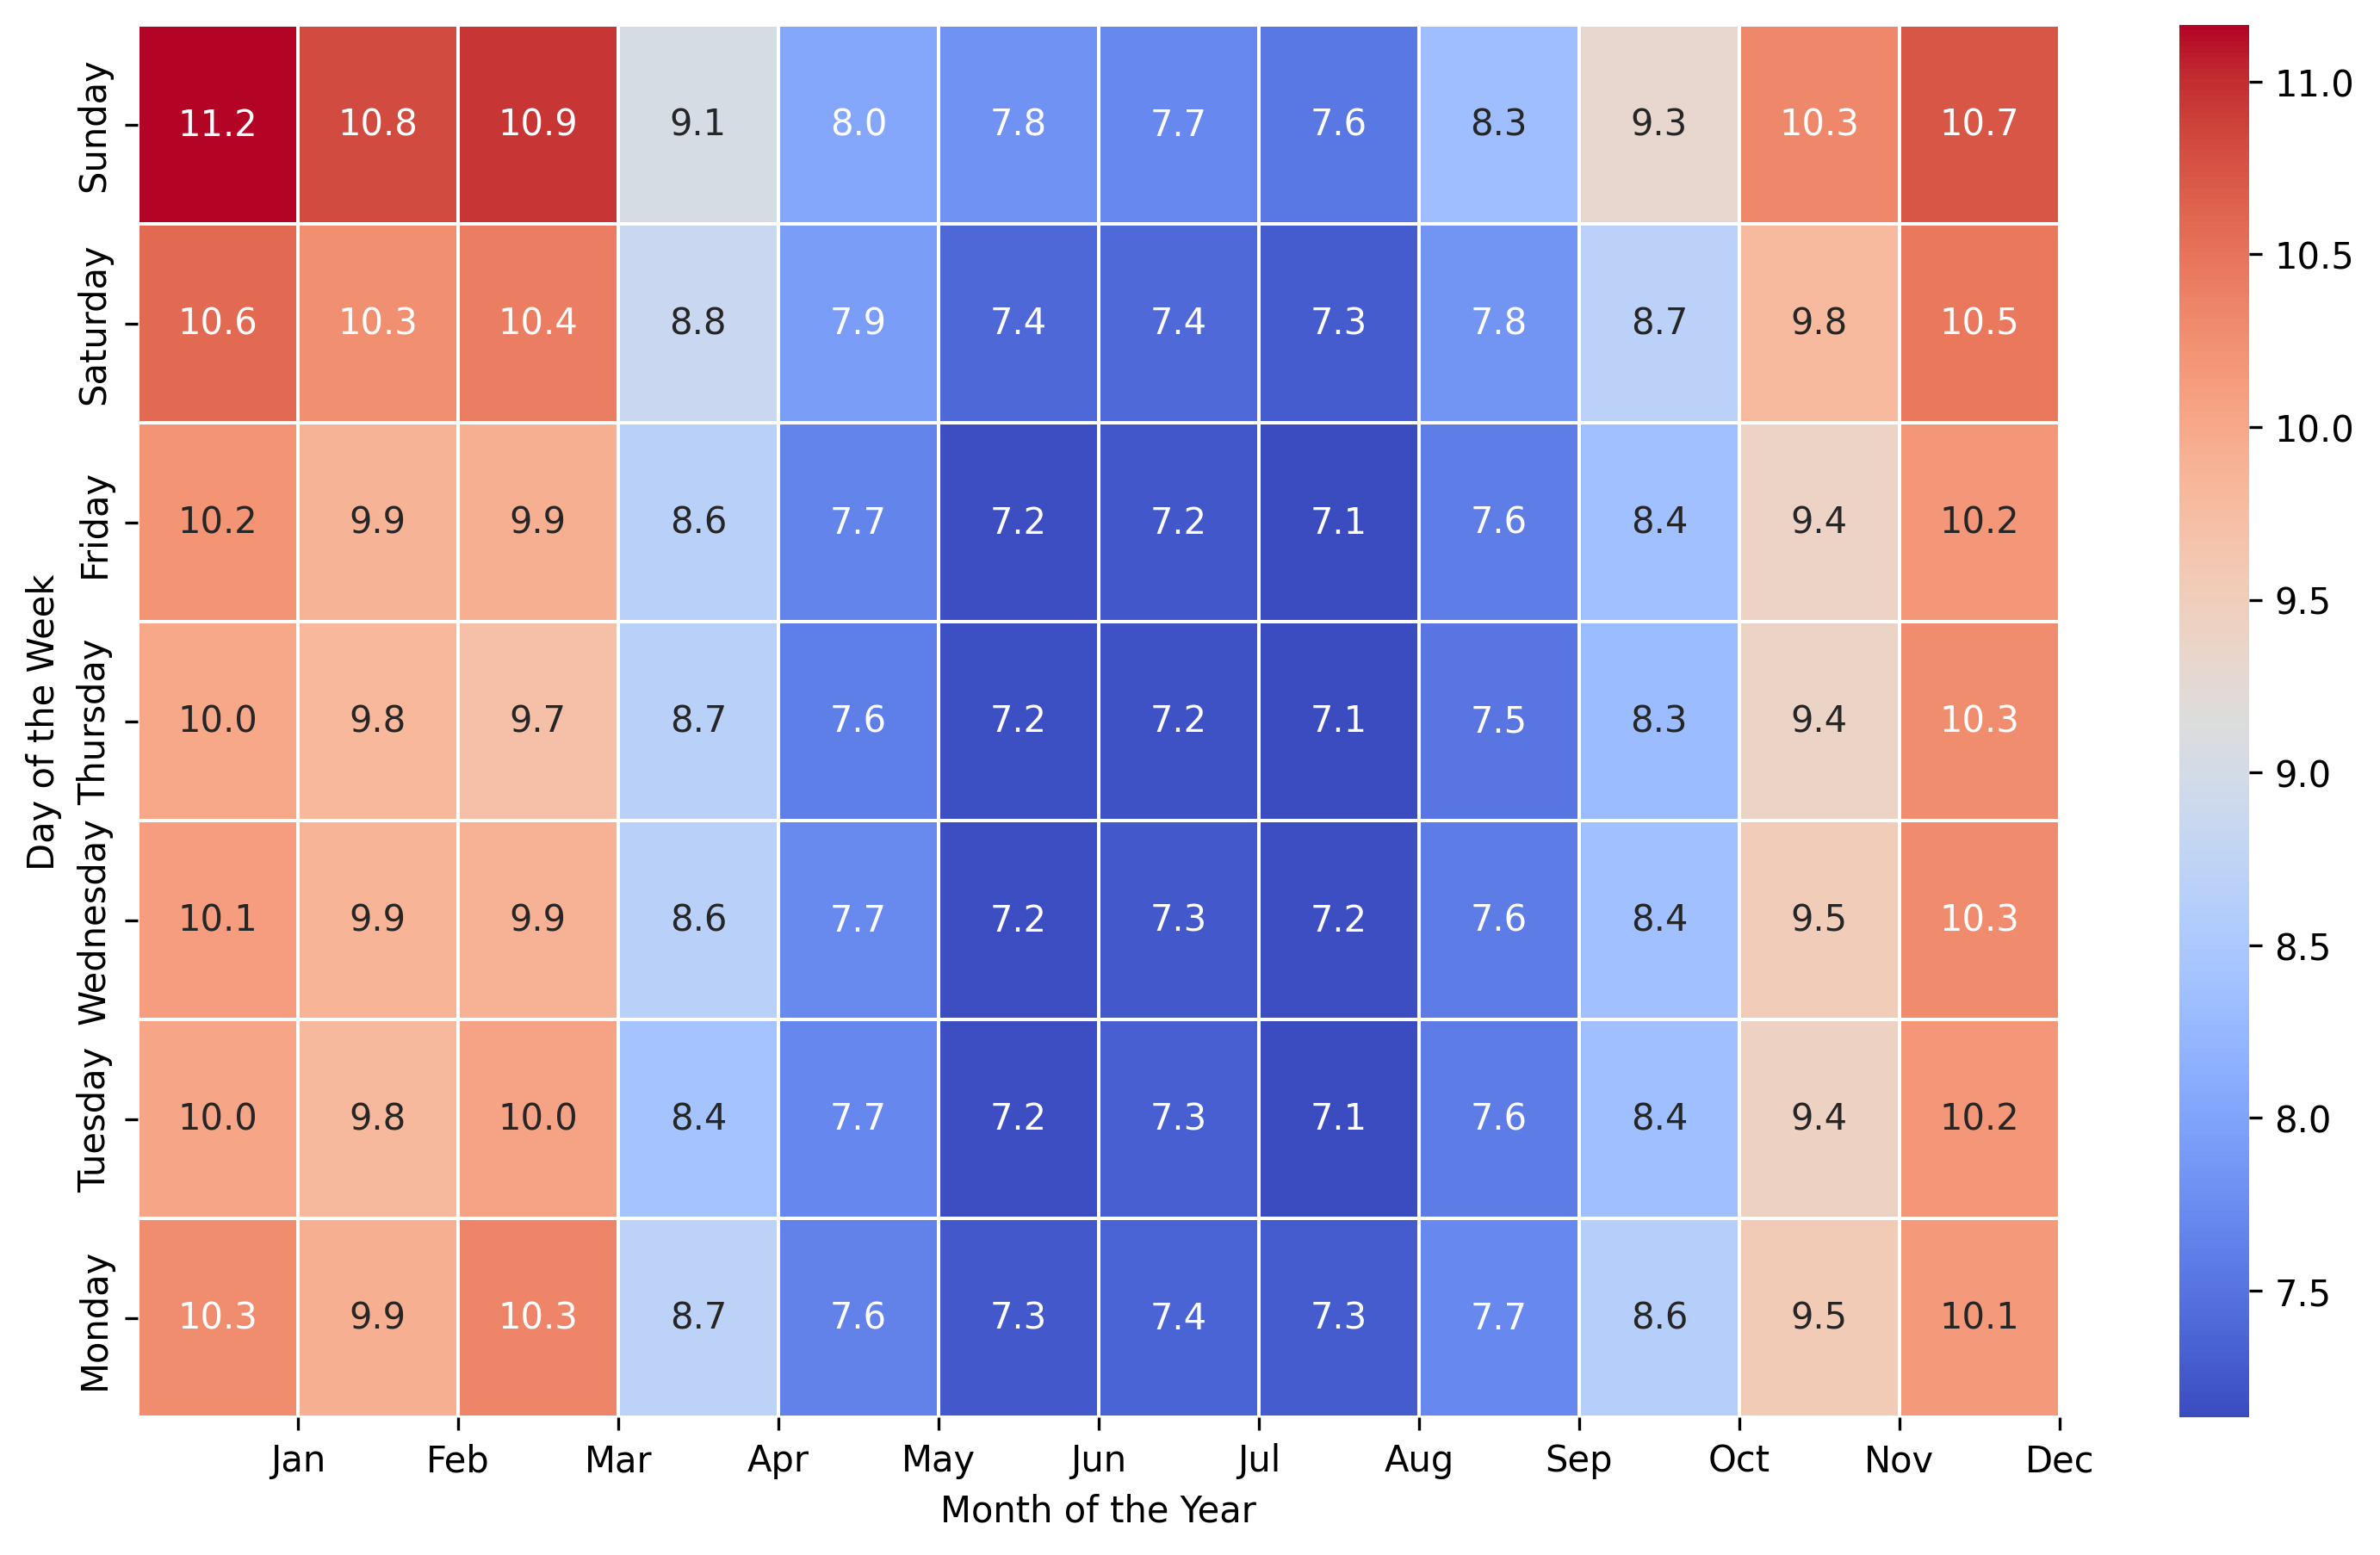

In [9]:
# Ensure 'day' column is datetime type
df['day'] = pd.to_datetime(df['day'])

# Extract day of week and month from the 'day' column
df['day_of_week'] = df['day'].dt.day_name()
df['month_of_year'] = df['day'].dt.month

# Create a categorical type for 'day_of_week' with a logical order
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=days, ordered=True)

# Aggregate data by day of week and month of year
aggregated_data = df.groupby(['day_of_week', 'month_of_year'])['energy_sum'].mean().reset_index()

# Pivot the data for heatmap
pivot_table = aggregated_data.pivot(index='day_of_week', columns='month_of_year', values='energy_sum')

# Plotting the heatmap
plt.figure(figsize=(12, 7))
# cmap = sns.diverging_palette(220, 300, s= 80, l = 60, sep = 50, as_cmap=True)
cmap = sns.color_palette("coolwarm", as_cmap=True)
# cmap = sns.cubehelix_palette(start=2, reverse=True, as_cmap=True)

ax = sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap=cmap, linewidths=.5)
# plt.title('Average Daily Energy Consumption by Day of Week and Month')
plt.ylabel('Day of the Week')
plt.xlabel('Month of the Year')
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])  # Ensuring month labels are correctly named
ax.invert_yaxis()
plt.savefig('day_of_week.pdf', format ='pdf', bbox_inches='tight')
plt.show()


/home/ava_mohammadi/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/home/ava_mohammadi/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/home/ava_mohammadi/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/home/ava_mohammadi/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an er

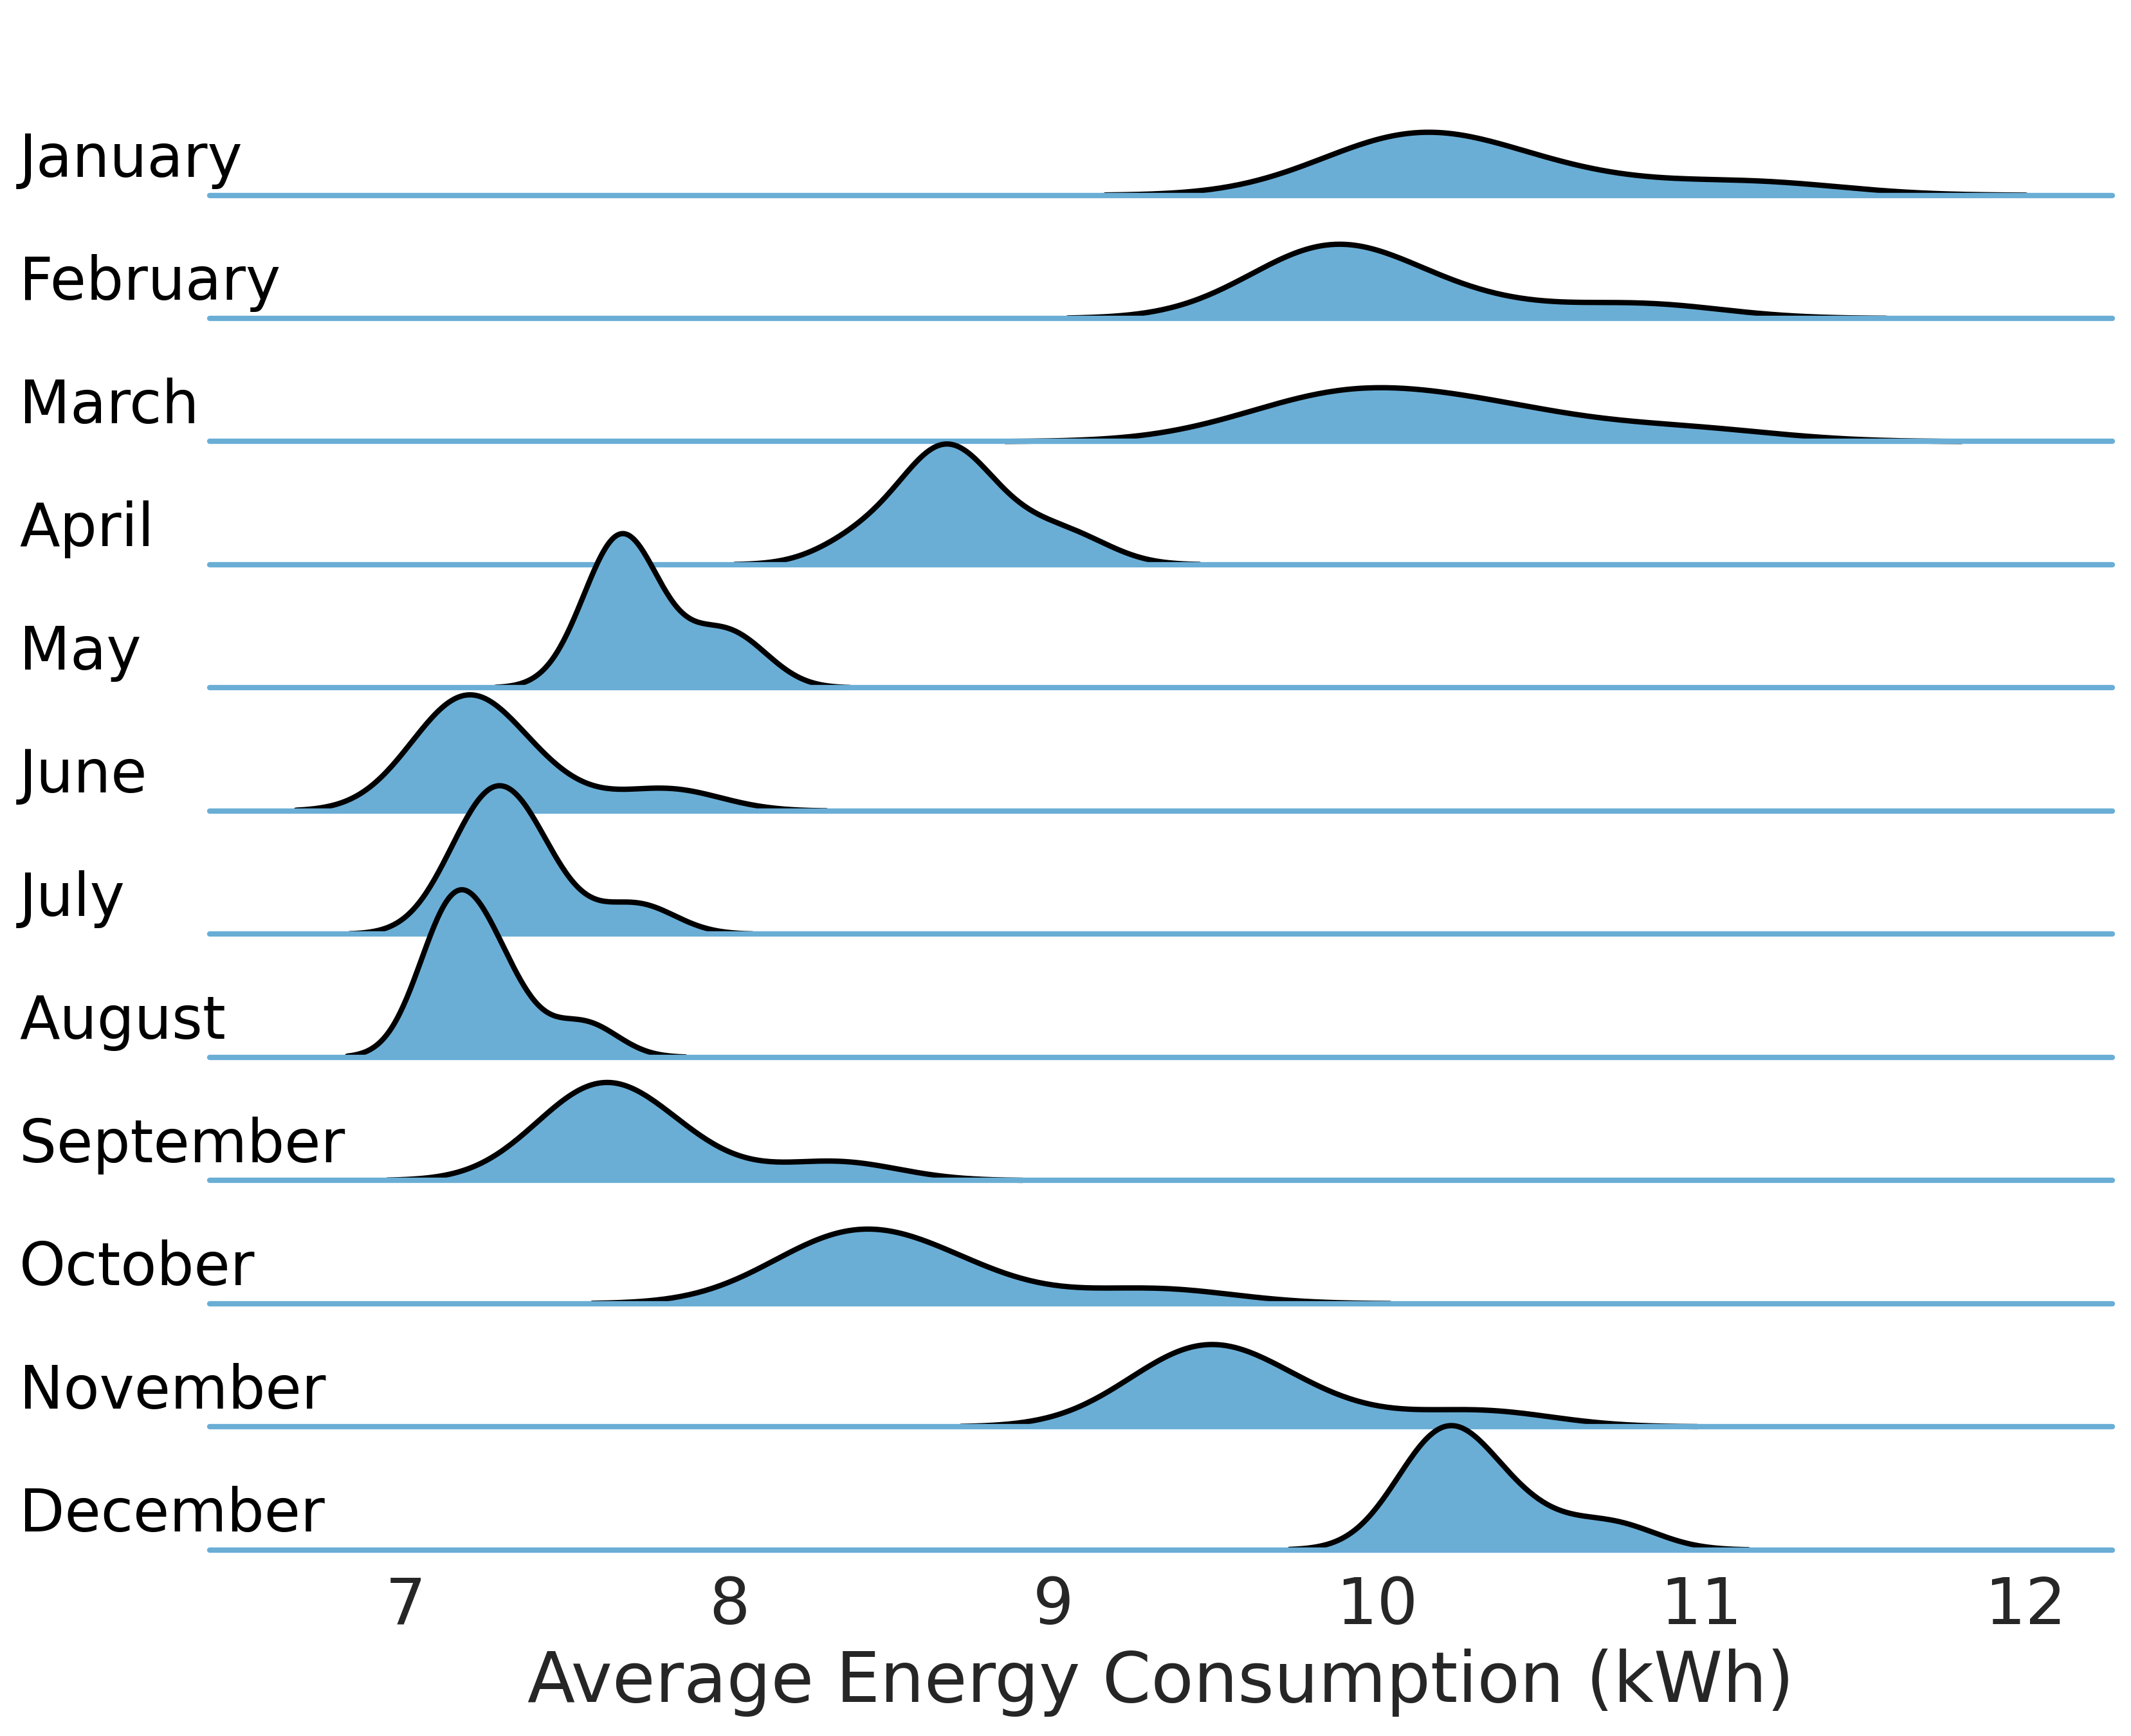

In [16]:

# Convert 'month_of_year' from numbers to month names for better readability
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
aggregated_data['month_of_year'] = pd.Categorical(aggregated_data['month_of_year'].apply(lambda x: months[x-1]), categories=months, ordered=True)

# Convert 'day_of_week' to a categorical type
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
aggregated_data['day_of_week'] = pd.Categorical(aggregated_data['day_of_week'], categories=days, ordered=True)


sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

pal = sns.color_palette("Blues",1)
g = sns.FacetGrid(aggregated_data, row="month_of_year", hue="month_of_year", aspect=15, height=0.75, palette=pal)

g.map(sns.kdeplot, 'energy_sum', clip_on=False, shade=True, alpha=1, lw=1.5, bw_adjust=1)
g.map(sns.kdeplot, 'energy_sum', clip_on=False, color="black", lw=2, bw_adjust=1)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

def label(x, color, label):
    ax = plt.gca()
    ax.text(-0.1, .2, label, color='black', ha="left", va="center", transform=ax.transAxes, fontsize=22)
g.map(label, "energy_sum")


g.fig.subplots_adjust(hspace=-0.3)
g.set_titles("")
g.set(yticks=[], ylabel="")
g.set_xlabels('Average Energy Consumption (kWh)', fontsize=26)
g.despine(bottom=True, left=True)

for ax in g.axes.flat:
    ax.tick_params(axis='x', which='major', labelsize=24)
    ax.tick_params(axis='y', which='major', labelsize=26)


plt.savefig('month_of_year_04.pdf', format='pdf', bbox_inches='tight')
plt.show()


In [34]:
daily_aggregated= df.groupby('day')[['energy_sum', 'dewPoint','temperature_avg', 'energy_sum_MA']].mean().reset_index()


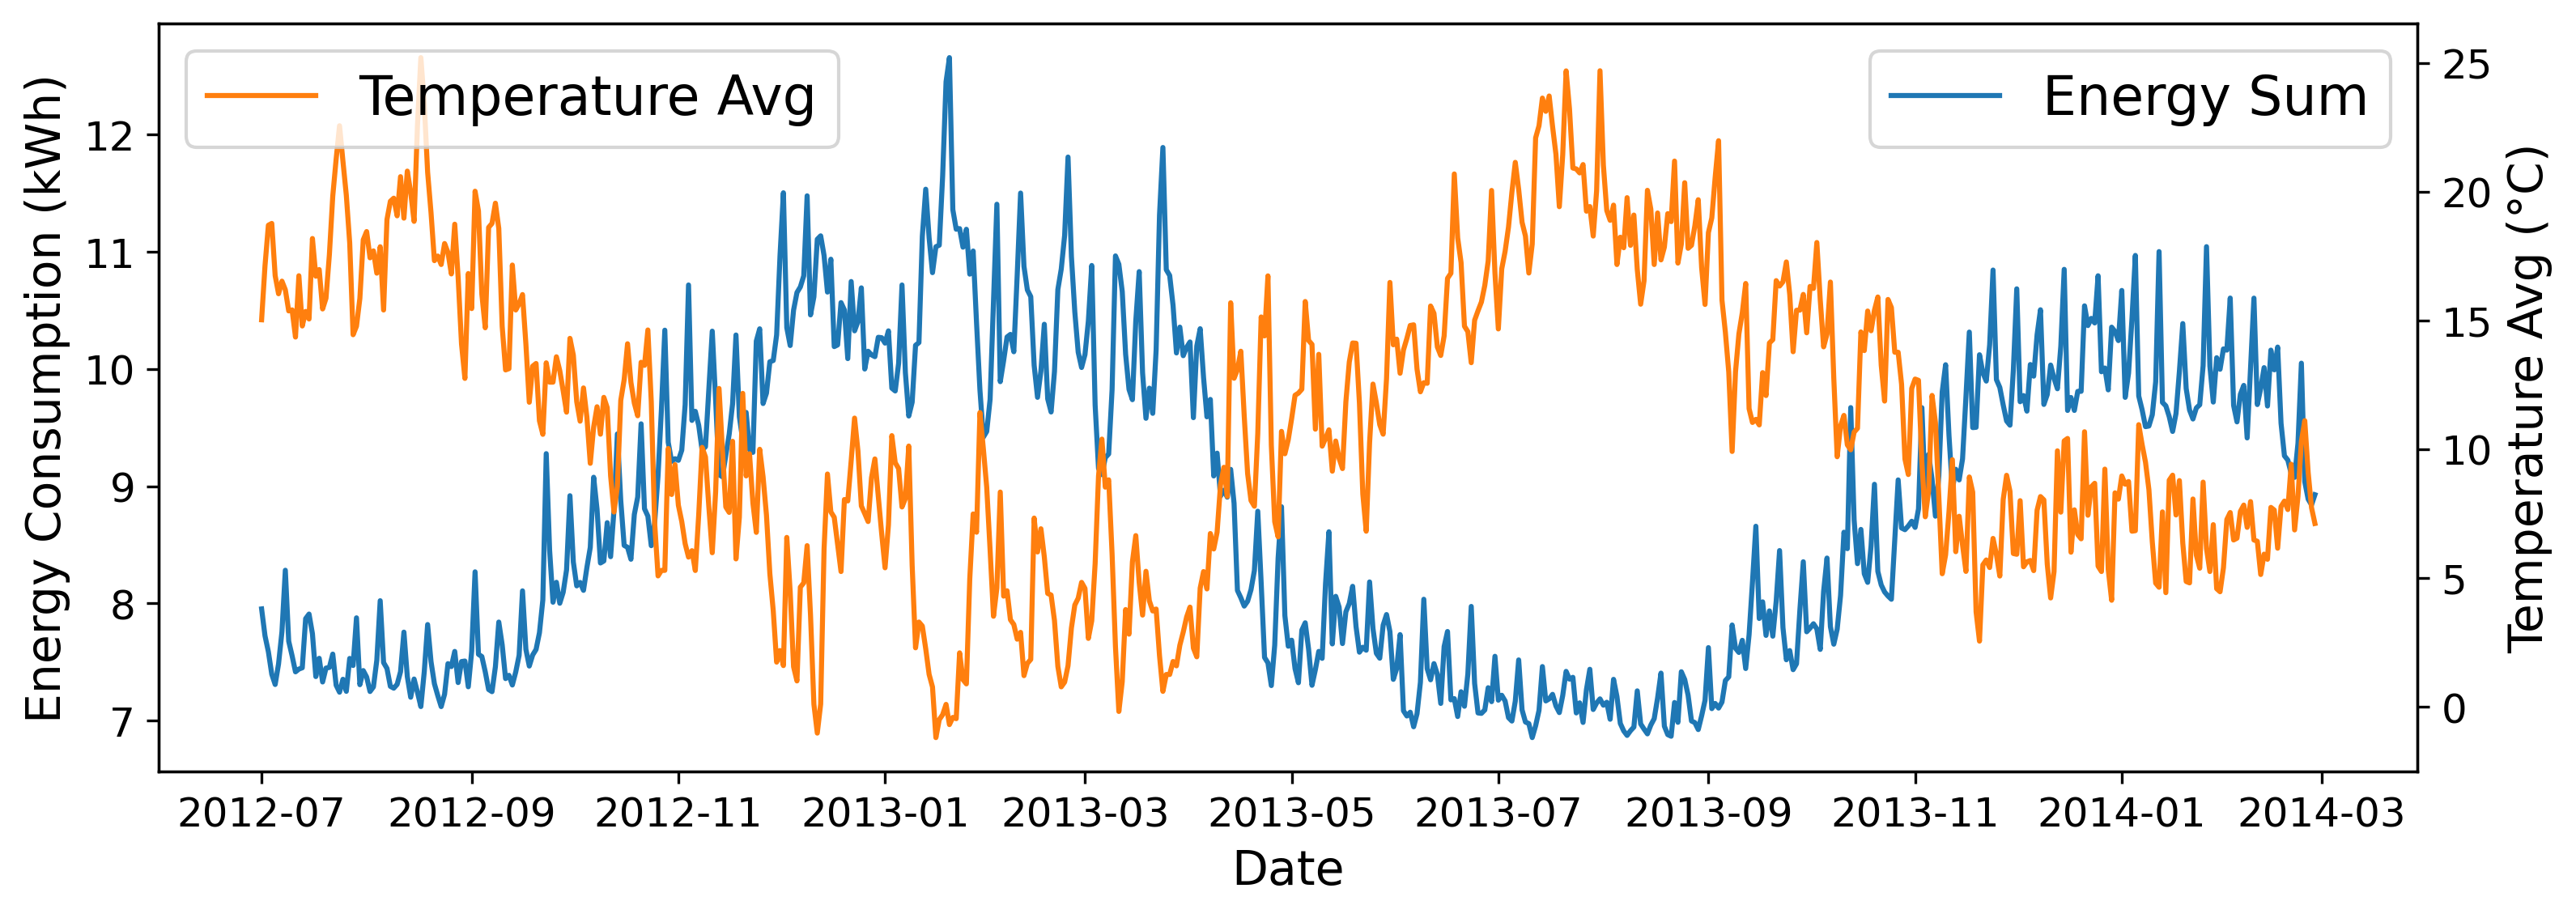

In [53]:

plt.rcParams.update({
    'font.size': 16,  # Default font size
    'axes.titlesize': 16,  # Title font size
    'axes.labelsize': 16,  # Axis label font size
    'xtick.labelsize': 12,  # X-tick label font size
    'ytick.labelsize': 14,  # Y-tick label font size
    'legend.fontsize': 16,  # Legend font size
})


df['day'] = pd.to_datetime(df['day'])

fig, ax1 = plt.subplots(figsize=(12, 4))

sns.lineplot(data=daily_aggregated, x='day', y='energy_sum', color='tab:blue', errorbar='sd', label='Energy Sum', ax=ax1)

ax2 = ax1.twinx()
sns.lineplot(data=daily_aggregated, x='day', y='temperature_avg', errorbar='sd', color='tab:orange', label='Temperature Avg', ax=ax2)


ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Energy Consumption (kWh)', fontsize=14)
ax2.set_ylabel('Temperature Avg (°C)', fontsize=14)

ax1.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)

ax2.grid(False)
plt.legend(loc='upper left')

plt.savefig('energy_temperature_plot.pdf', format='pdf', bbox_inches='tight')

# Show plot
plt.show()


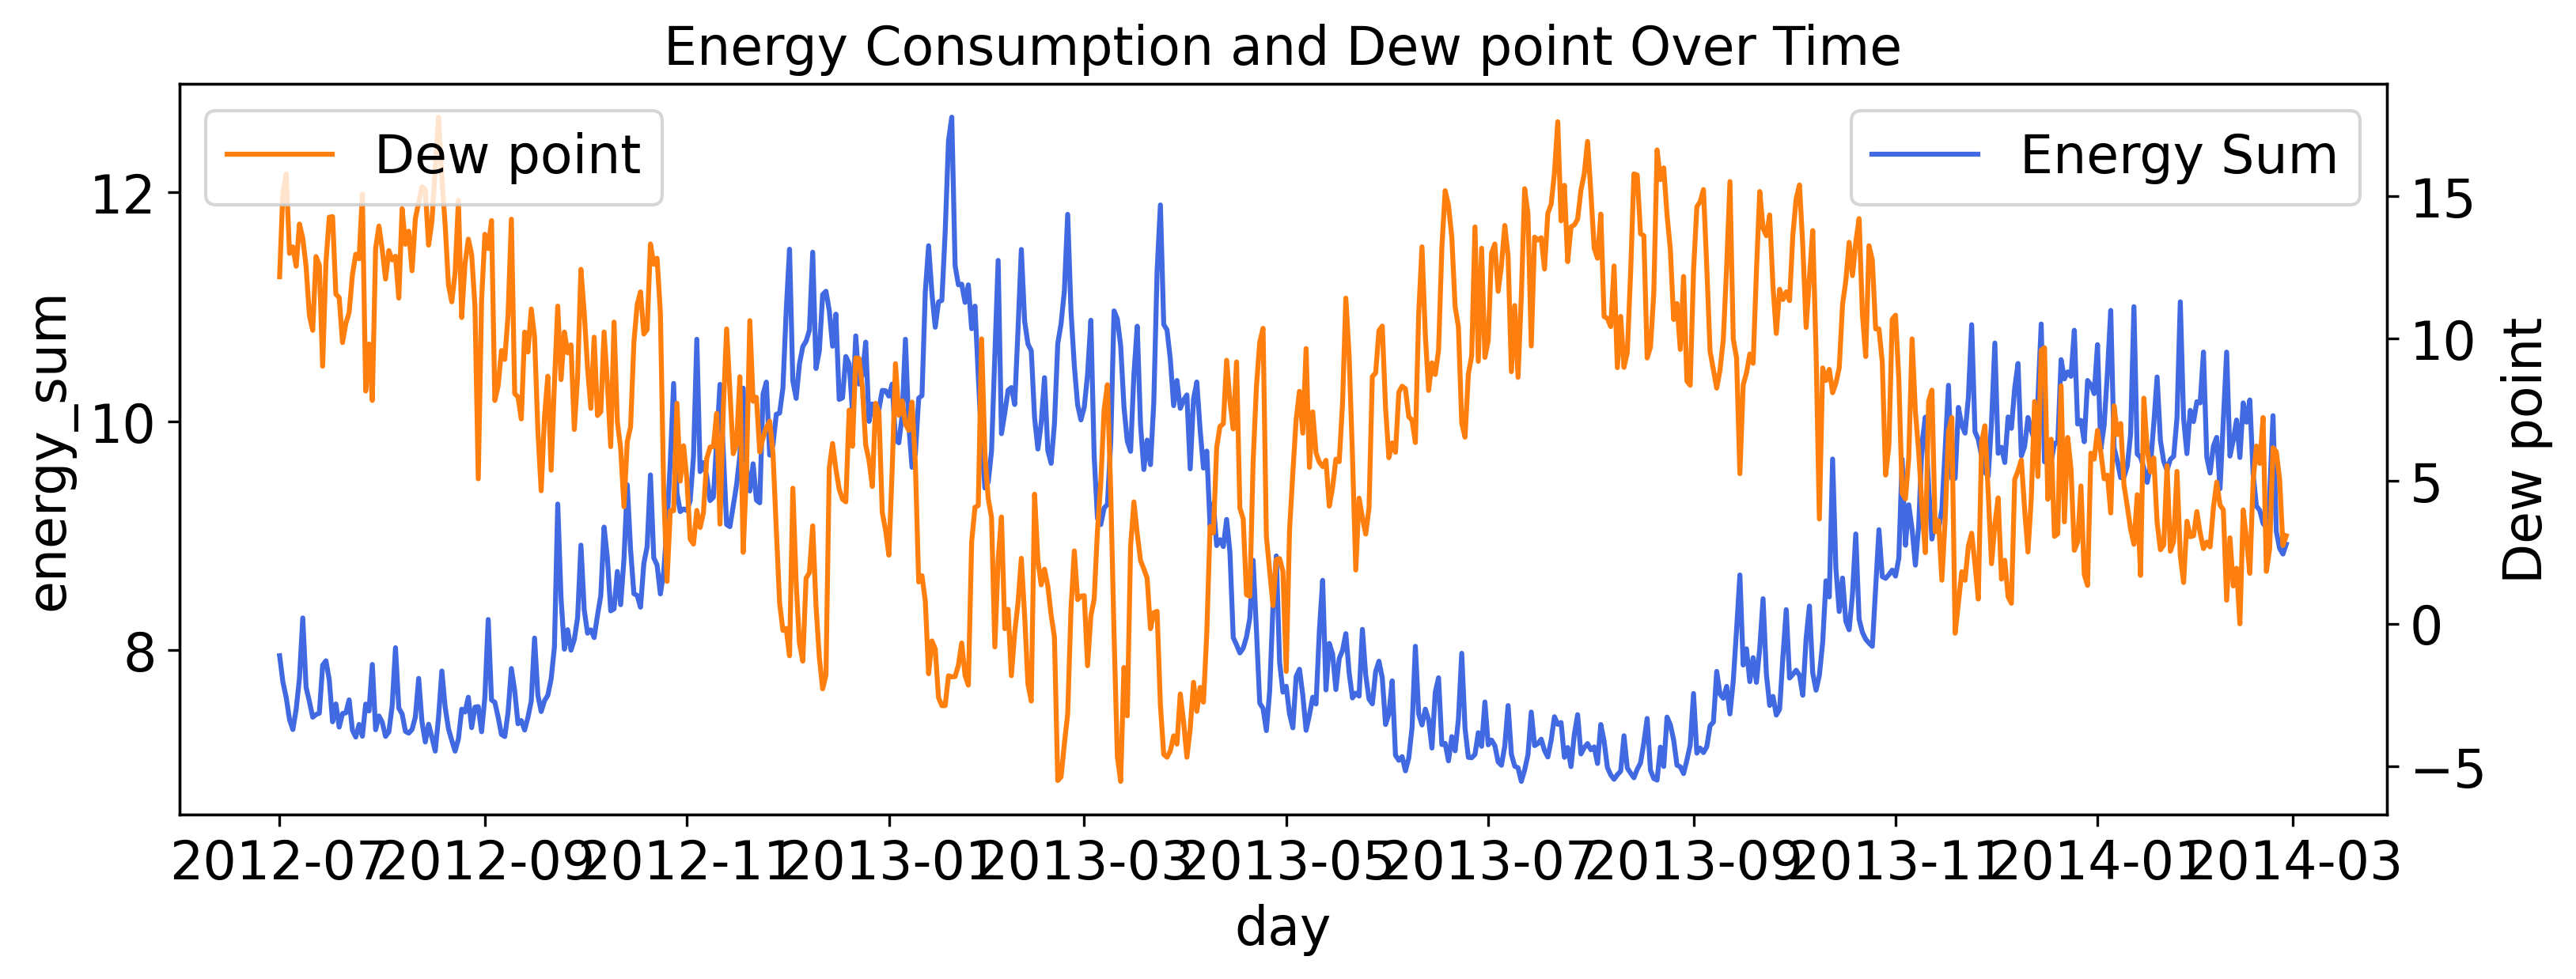

In [22]:

plt.figure(figsize=(12, 4))


sns.lineplot(data=daily_aggregated, x='day', y='energy_sum',color = 'royalblue', errorbar='sd', label='Energy Sum')

ax2 = plt.twinx()
sns.lineplot(data=daily_aggregated, x='day', y='dewPoint', errorbar='sd', color='tab:orange', label='Dew point', ax=ax2)

ax2.grid(True)
plt.title('Energy Consumption and Dew point Over Time')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
ax2.set_ylabel('Dew point')
plt.legend(loc='upper left')
plt.grid(False)


# Show plot
plt.show()

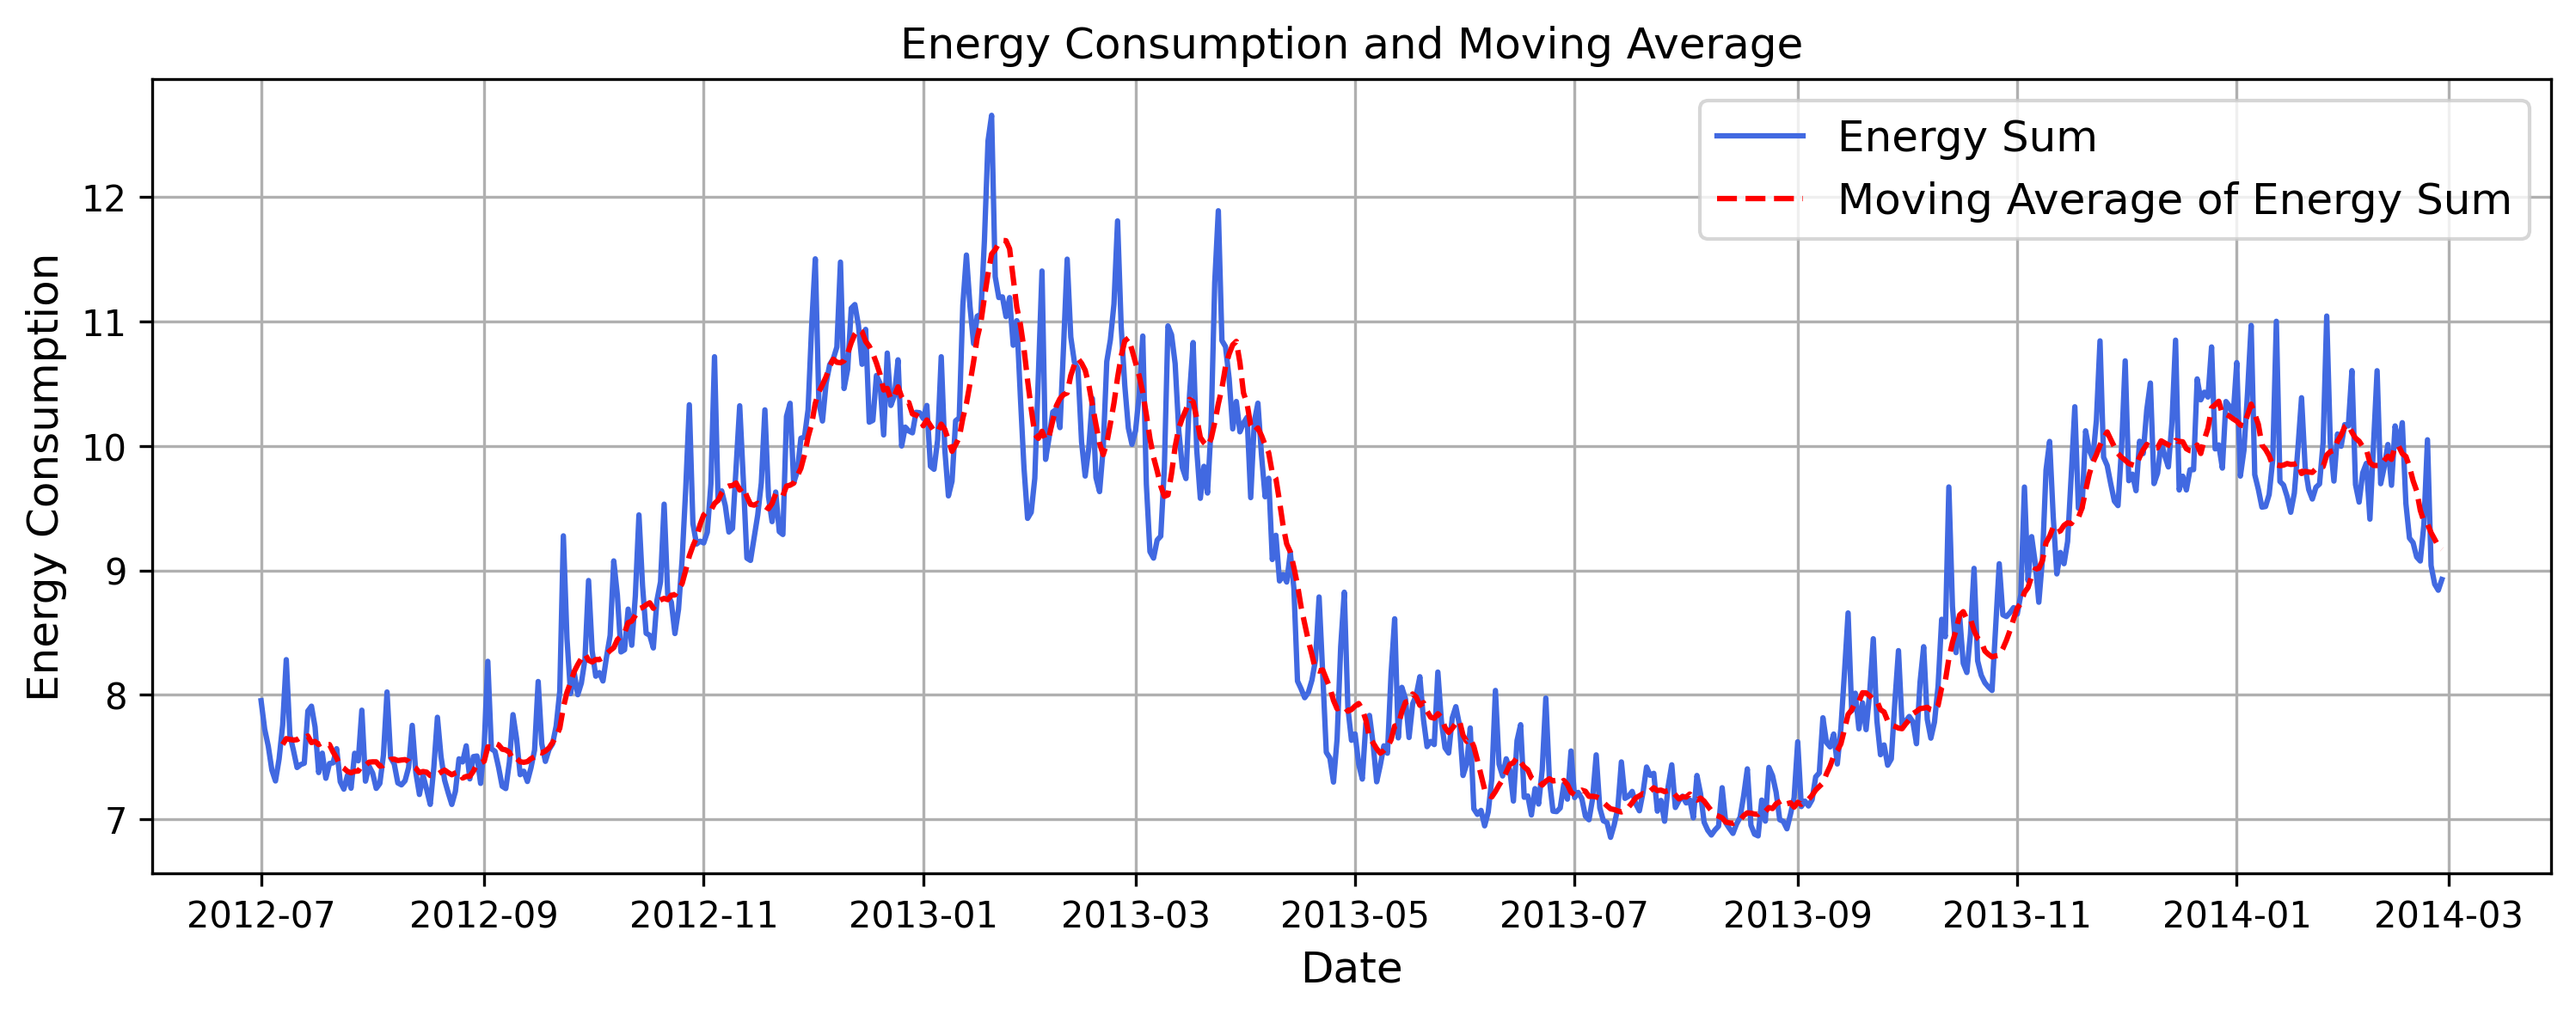

In [7]:

daily_aggregated['day'] = pd.to_datetime(daily_aggregated['day'])  
daily_aggregated.set_index('day', inplace=True) 

# Calculate the moving average of energy_sum
daily_aggregated['energy_sum_ma'] = daily_aggregated['energy_sum'].rolling(window=7).mean()

plt.figure(figsize=(12, 4))
plt.plot(daily_aggregated.index, daily_aggregated['energy_sum'], label='Energy Sum', color='royalblue')
plt.plot(daily_aggregated.index, daily_aggregated['energy_sum_ma'], label='Moving Average of Energy Sum', color='red', linestyle='--')

plt.title('Energy Consumption and Moving Average')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.legend()
plt.grid(True)
plt.show()


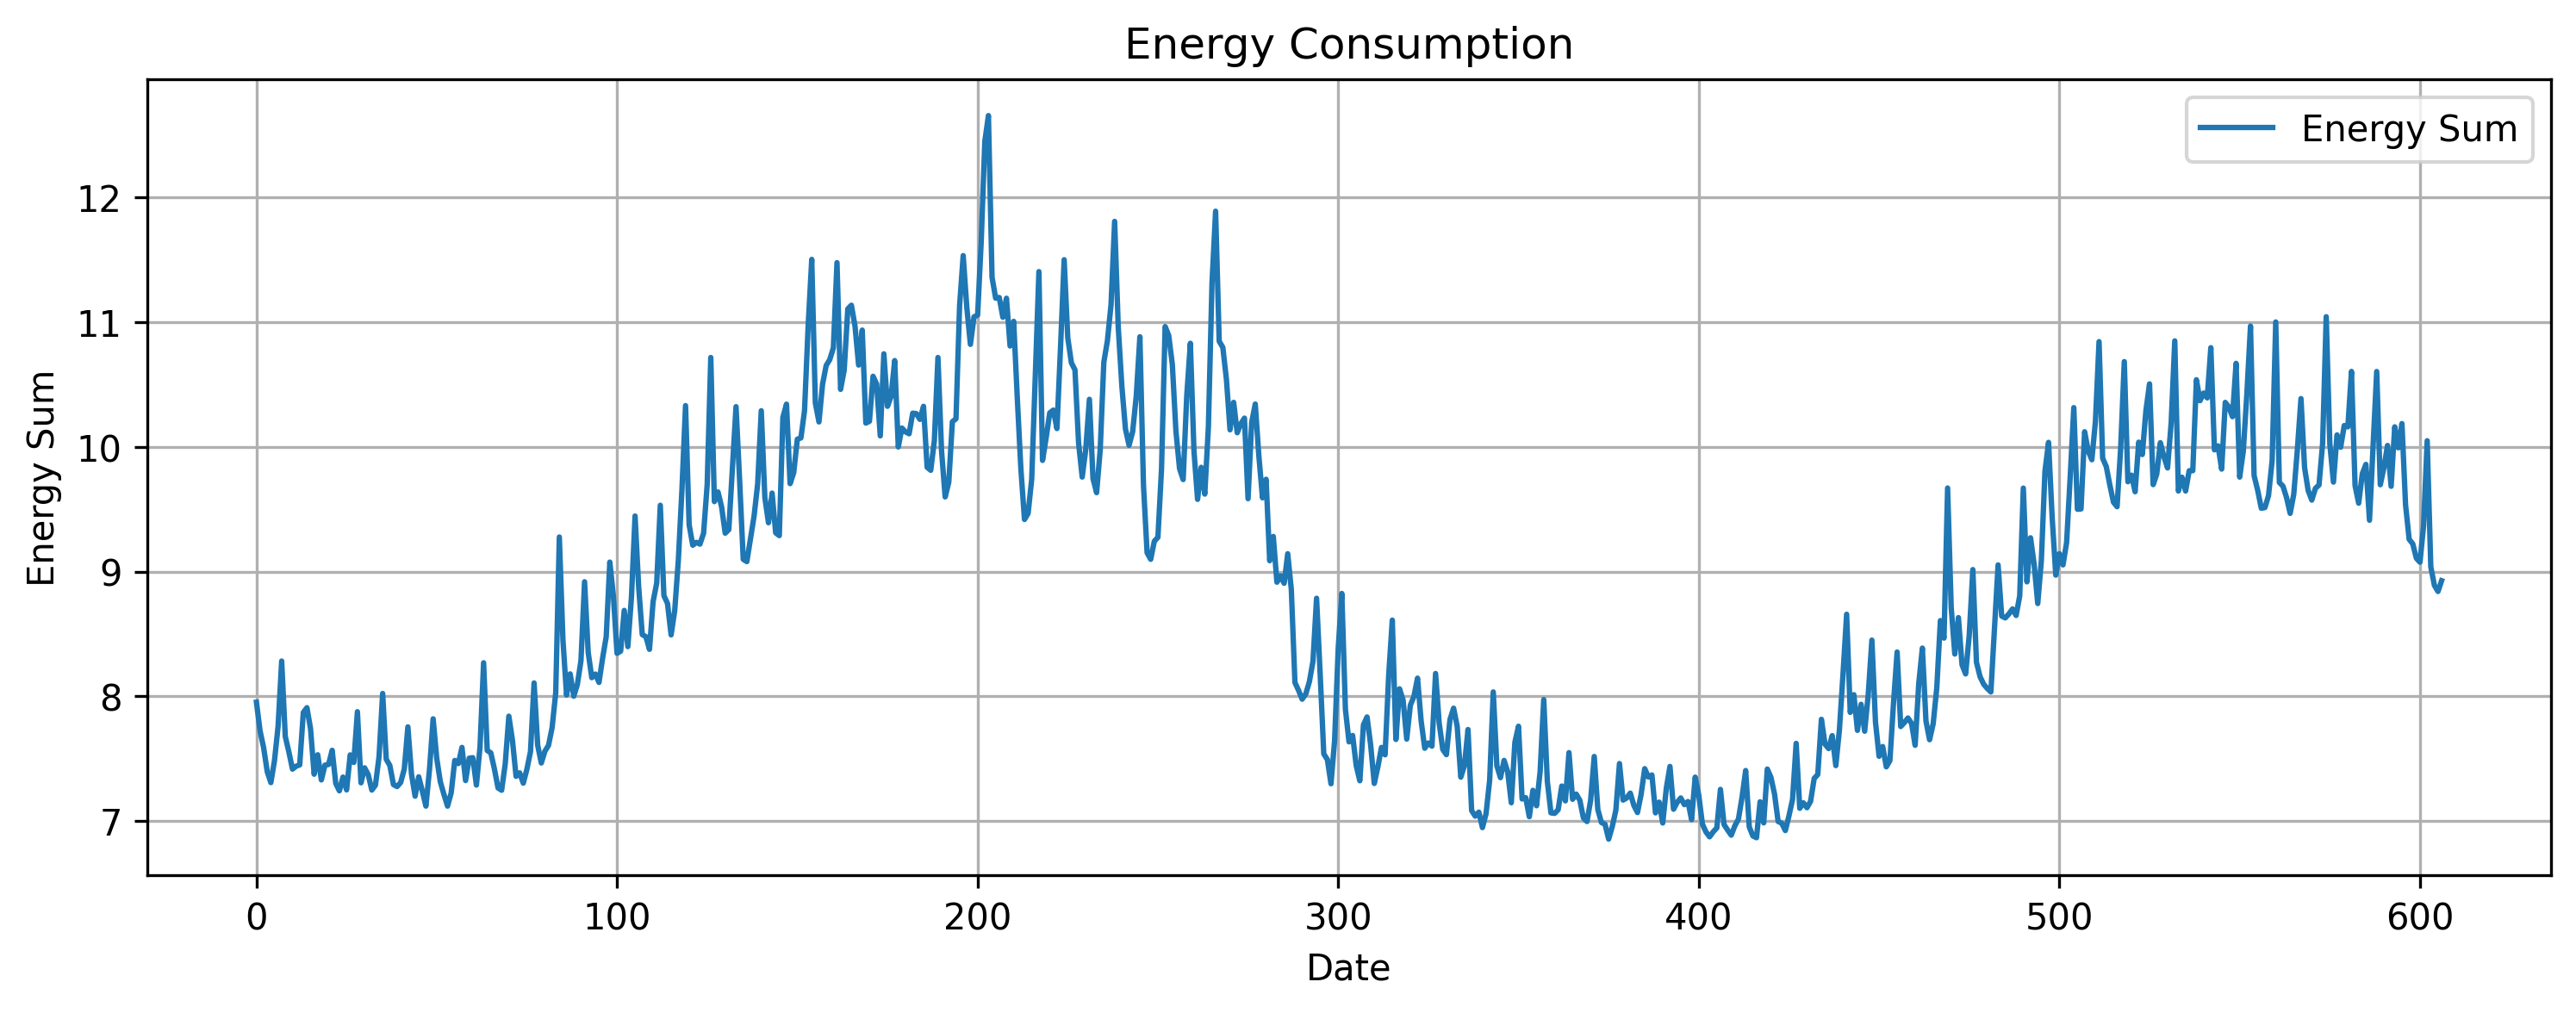

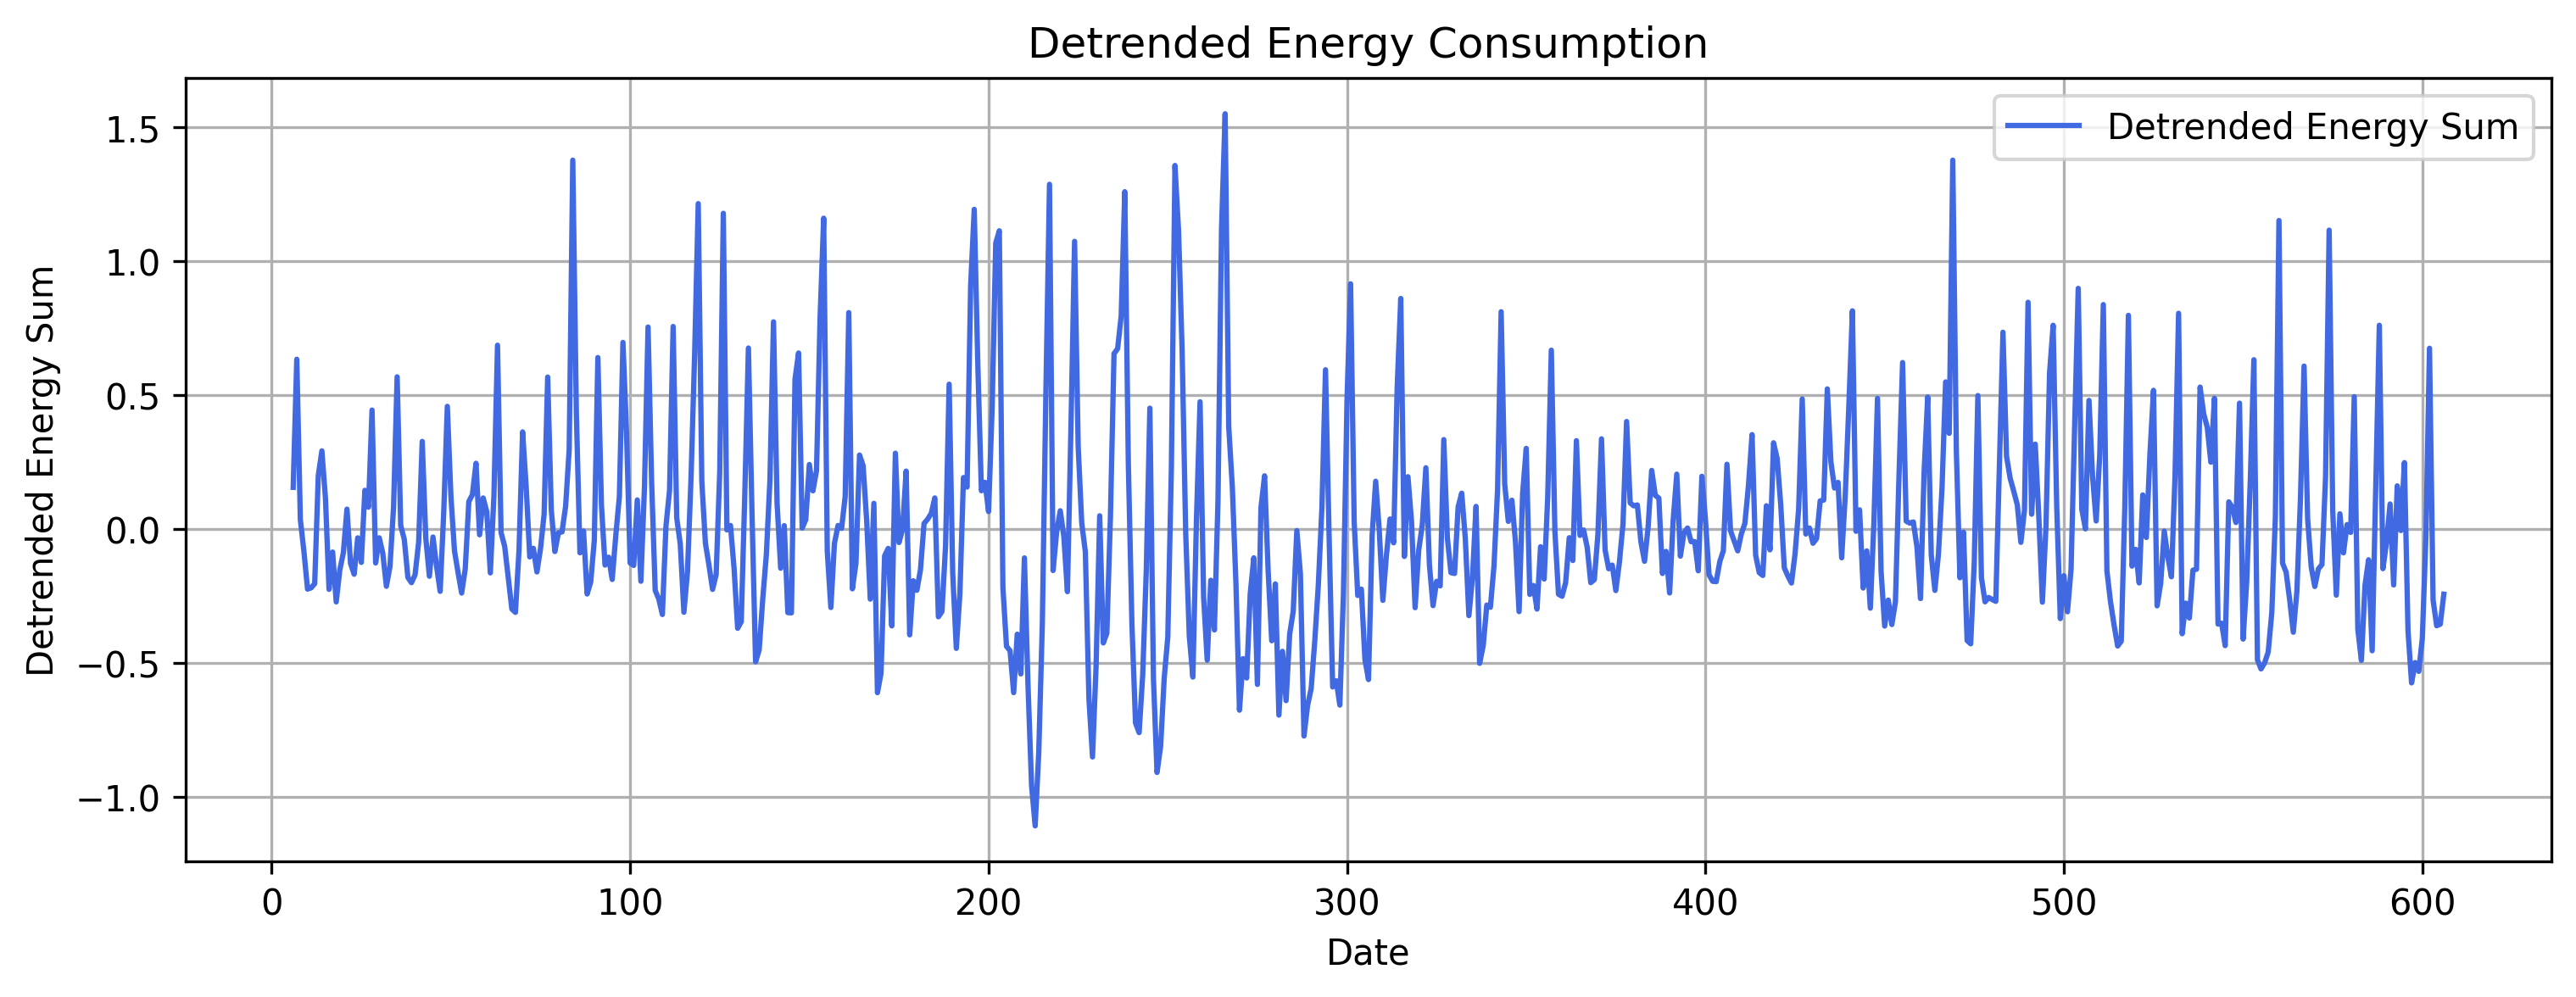

In [6]:

energy_sum_ts = daily_aggregated['energy_sum']

# Plot the time series data
plt.figure(figsize=(12, 4))
plt.plot(energy_sum_ts, label='Energy Sum', color ='tab:blue')
plt.title('Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Energy Sum')
plt.grid()
plt.legend()
plt.show()

# Detrend the time series using moving averages
window = 7  # You can adjust the window size as per your requirement
rolling_mean = energy_sum_ts.rolling(window=window).mean()
detrended_ts = energy_sum_ts - rolling_mean

# Plot the detrended time series
plt.figure(figsize=(12, 4))
plt.plot(detrended_ts, label='Detrended Energy Sum', color = 'royalblue')
plt.title('Detrended Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Detrended Energy Sum')
plt.grid()
plt.legend()
plt.show()


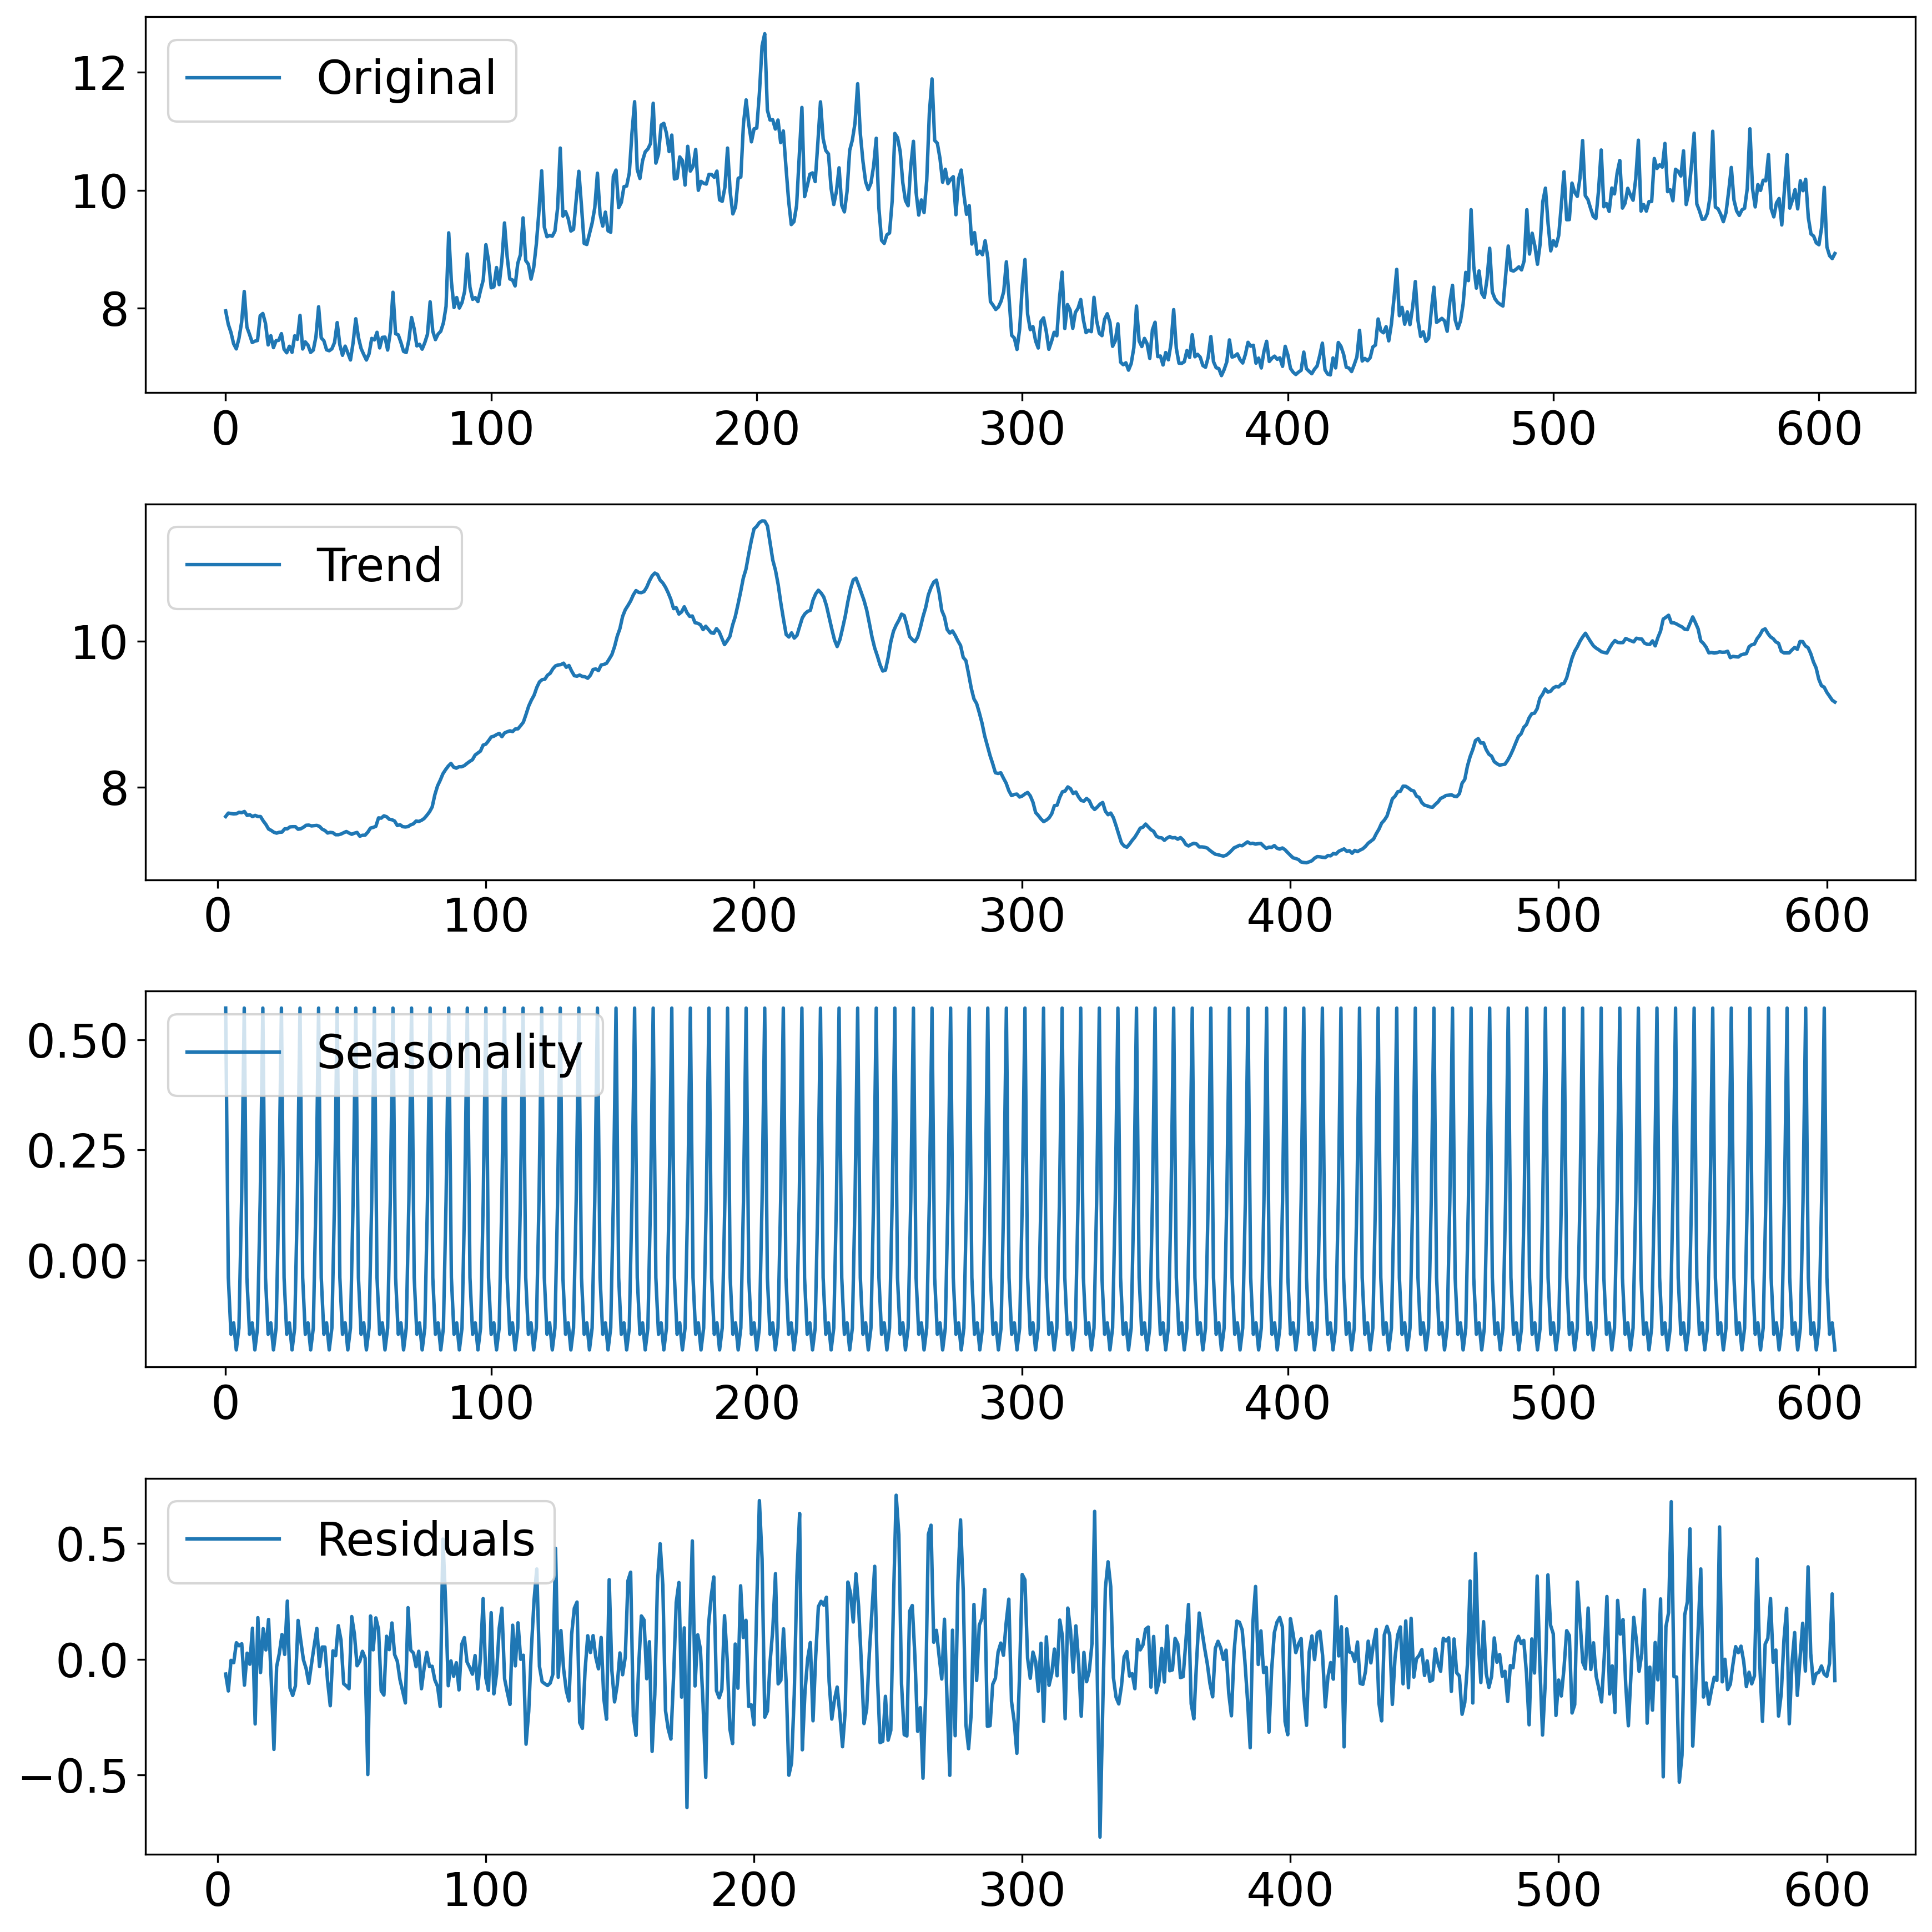

In [7]:

# Decompose the time series
decomposition = seasonal_decompose(energy_sum_ts, model='additive', period=7) 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Set larger font sizes
plt.rcParams.update({
    'font.size': 20,  
    'axes.titlesize': 20,  
    'axes.labelsize': 20,  
    'xtick.labelsize': 20,  
    'ytick.labelsize': 20,  
    'legend.fontsize': 20, 
})

# Plot the decomposed components
plt.figure(figsize=(12, 12))

plt.subplot(411)
plt.plot(energy_sum_ts, label='Original')
plt.legend(loc='upper left')


plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')


plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')


plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')


plt.tight_layout()
plt.savefig('decomposed_time_series_01.pdf', format='pdf', bbox_inches='tight')
plt.show()



<Figure size 3000x1200 with 0 Axes>

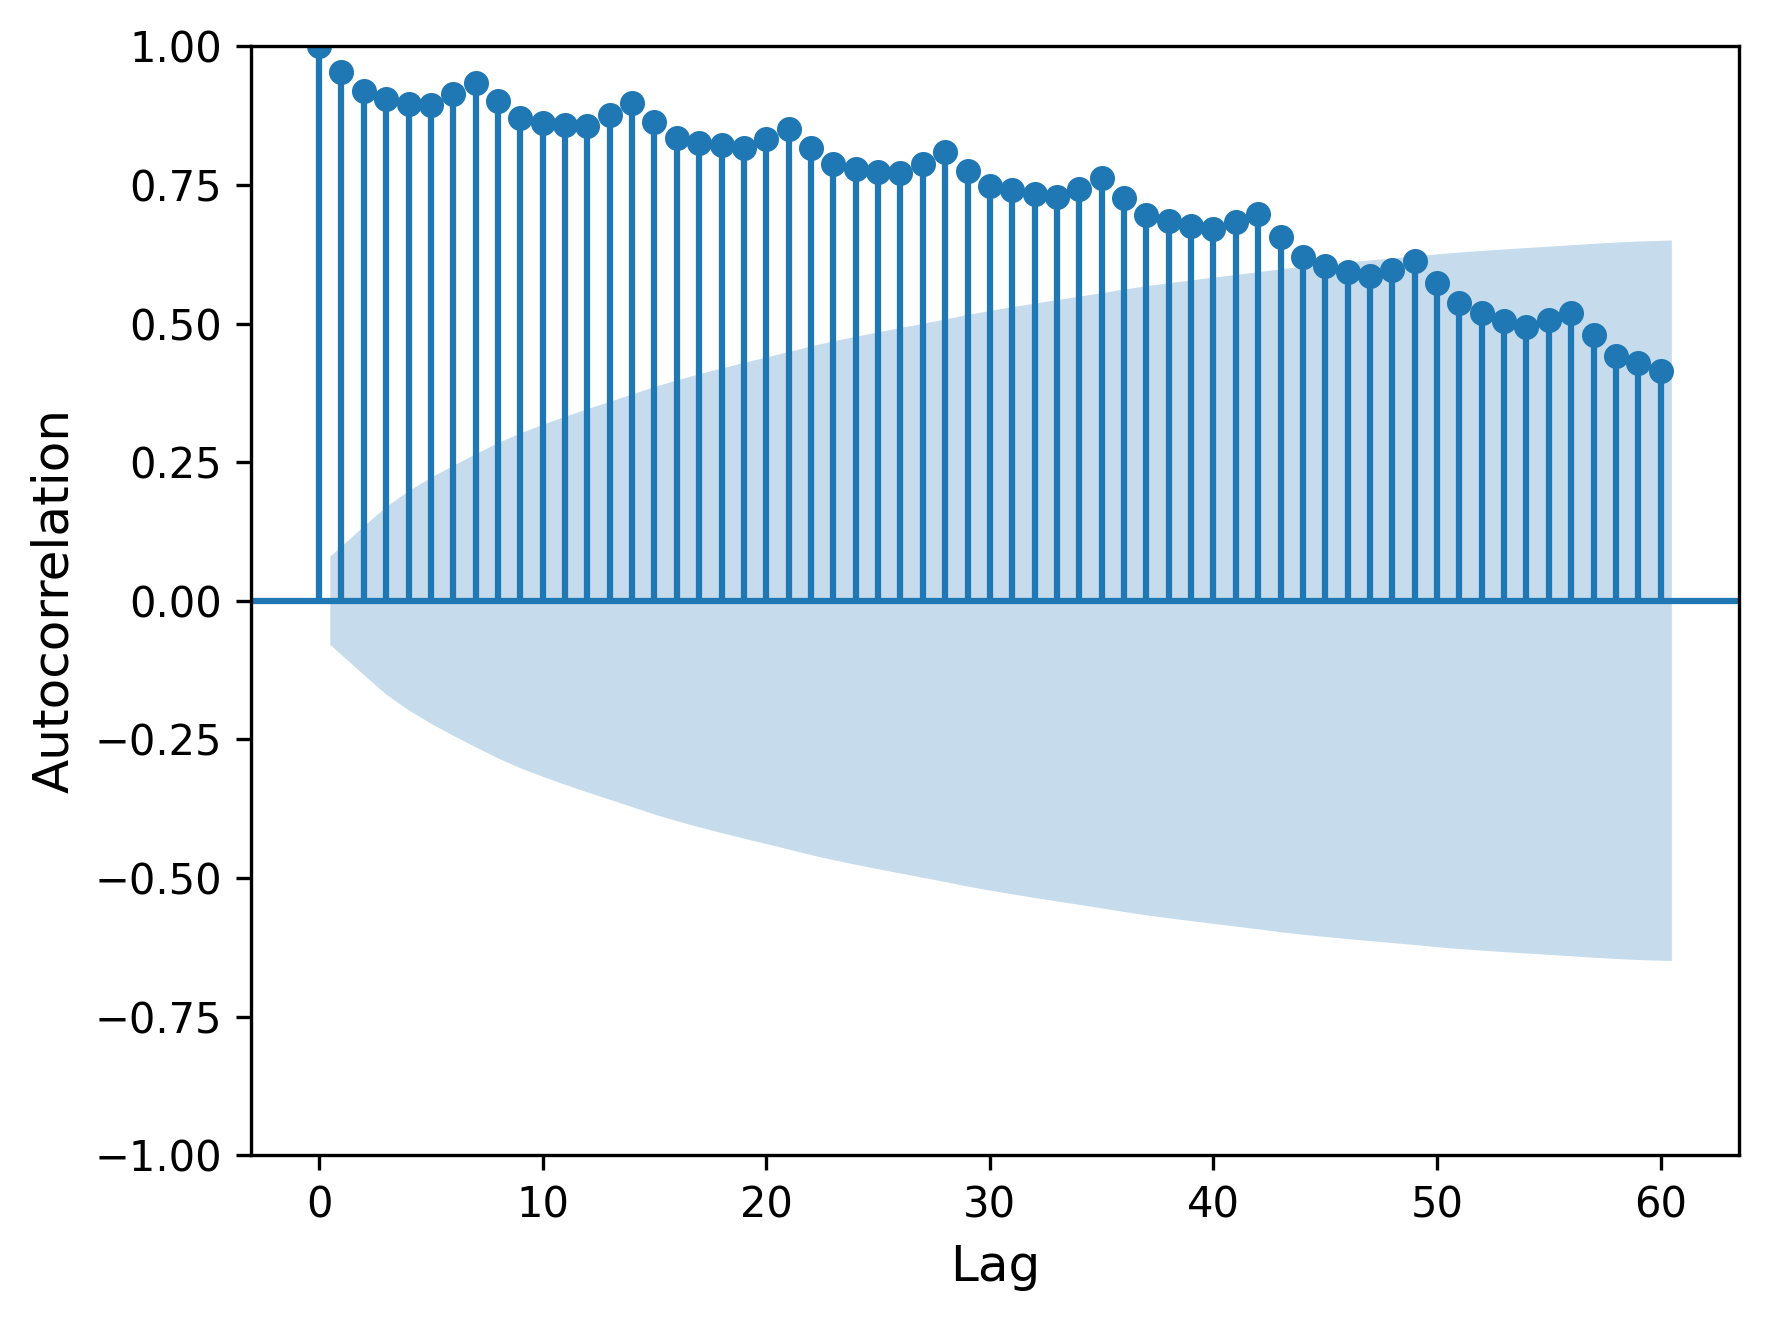

In [38]:
# Set larger font sizes
plt.rcParams.update({
    'font.size': 12,  
    'axes.titlesize': 12,  
    'axes.labelsize': 12,  
    'xtick.labelsize': 10,  
    'ytick.labelsize': 10,  
    'legend.fontsize': 12, 
})
# Plot autocorrelation
plt.figure(figsize=(10, 4))
plot_acf(energy_sum_ts , lags=60, adjusted= True, color = "tab:blue", title=None)
# plt.title('Autocorrelation Function (ACF)')
# plt.grid()
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.savefig('autocorelation.pdf', format='pdf', bbox_inches='tight')
plt.show()


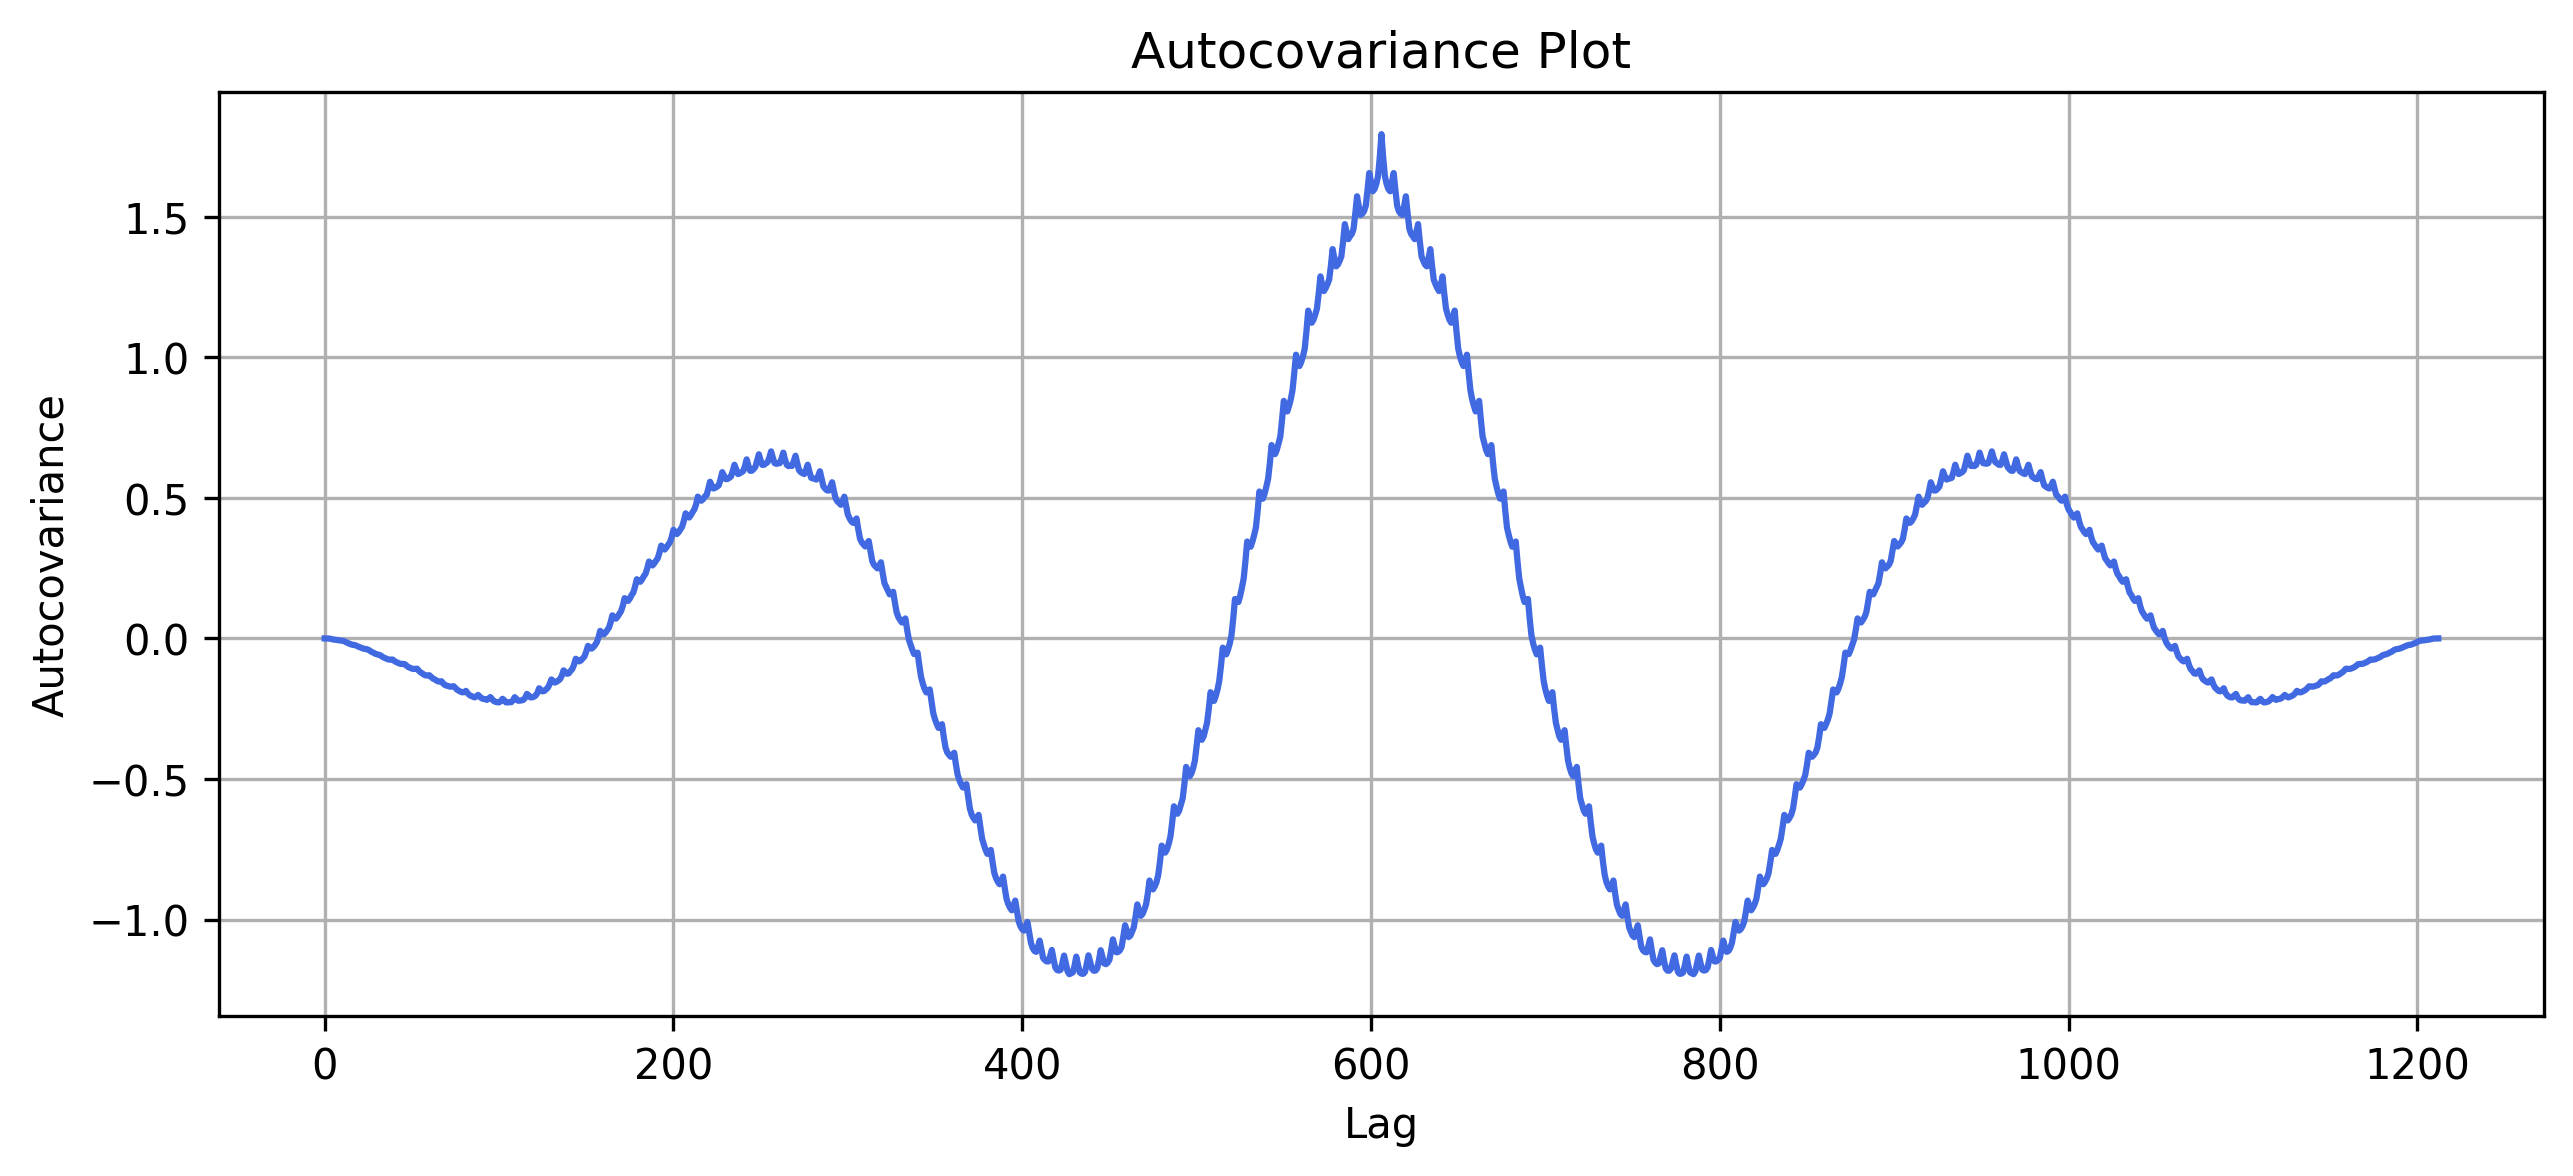

In [29]:
# Calculate autocovariance
autocovariance = np.correlate(energy_sum_ts.values - energy_sum_ts.mean(), energy_sum_ts.values - energy_sum_ts.mean(), mode='full') / len(energy_sum_ts)

# Plot autocovariance
plt.figure(figsize=(10, 4))
plt.plot(autocovariance, color = 'tab:blue')
plt.title('Autocovariance Plot')
plt.xlabel('Lag')
plt.ylabel('Autocovariance')
plt.grid(True)
plt.show()


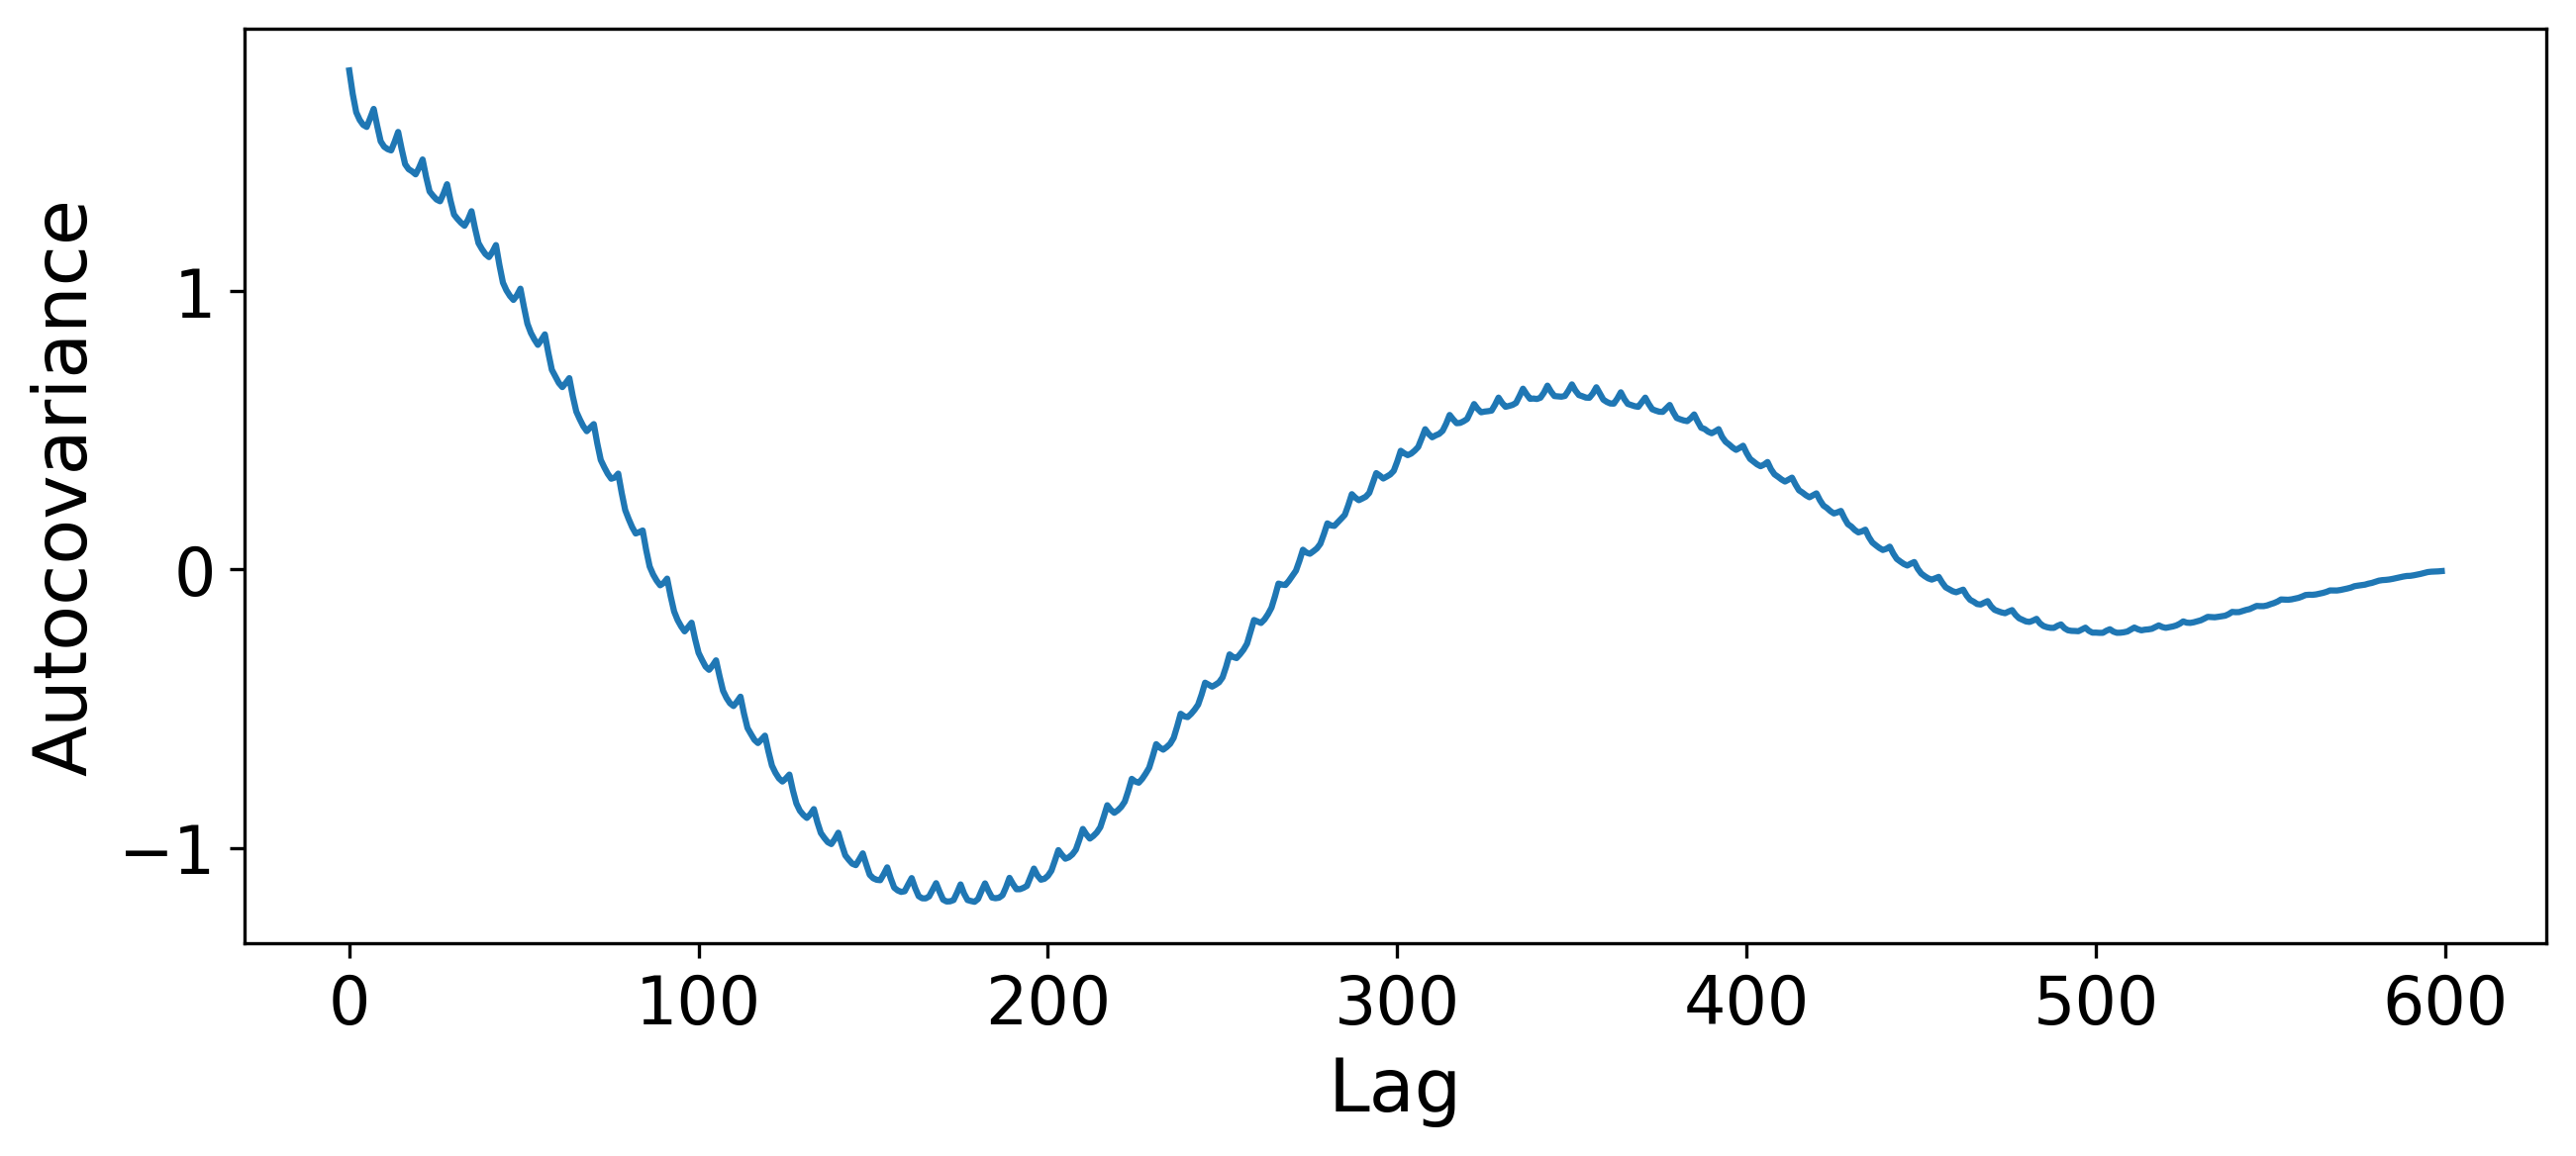

In [9]:

# Calculate autocovariance
autocovariance = np.correlate(energy_sum_ts.values - energy_sum_ts.mean(), energy_sum_ts.values - energy_sum_ts.mean(), mode='full')
autocovariance = autocovariance[len(autocovariance)//2:] / len(energy_sum_ts)

plt.rcParams.update({
    'font.size': 18,  
    'axes.titlesize': 18,  
    'axes.labelsize': 18, 
    'xtick.labelsize': 16,  
    'ytick.labelsize': 16,  
    'legend.fontsize': 18, 
})

# Plot autocovariance
plt.figure(figsize=(10, 4))
plt.plot(autocovariance[:600], color = 'tab:blue')  # Adjust 200 to the maximum lag of interest
# plt.title('Autocovariance Plot')
plt.xlabel('Lag')
plt.ylabel('Autocovariance')
# plt.grid(True)
plt.savefig('autocovariance.pdf', format='pdf', bbox_inches='tight')
plt.show()


<Figure size 3600x1800 with 0 Axes>

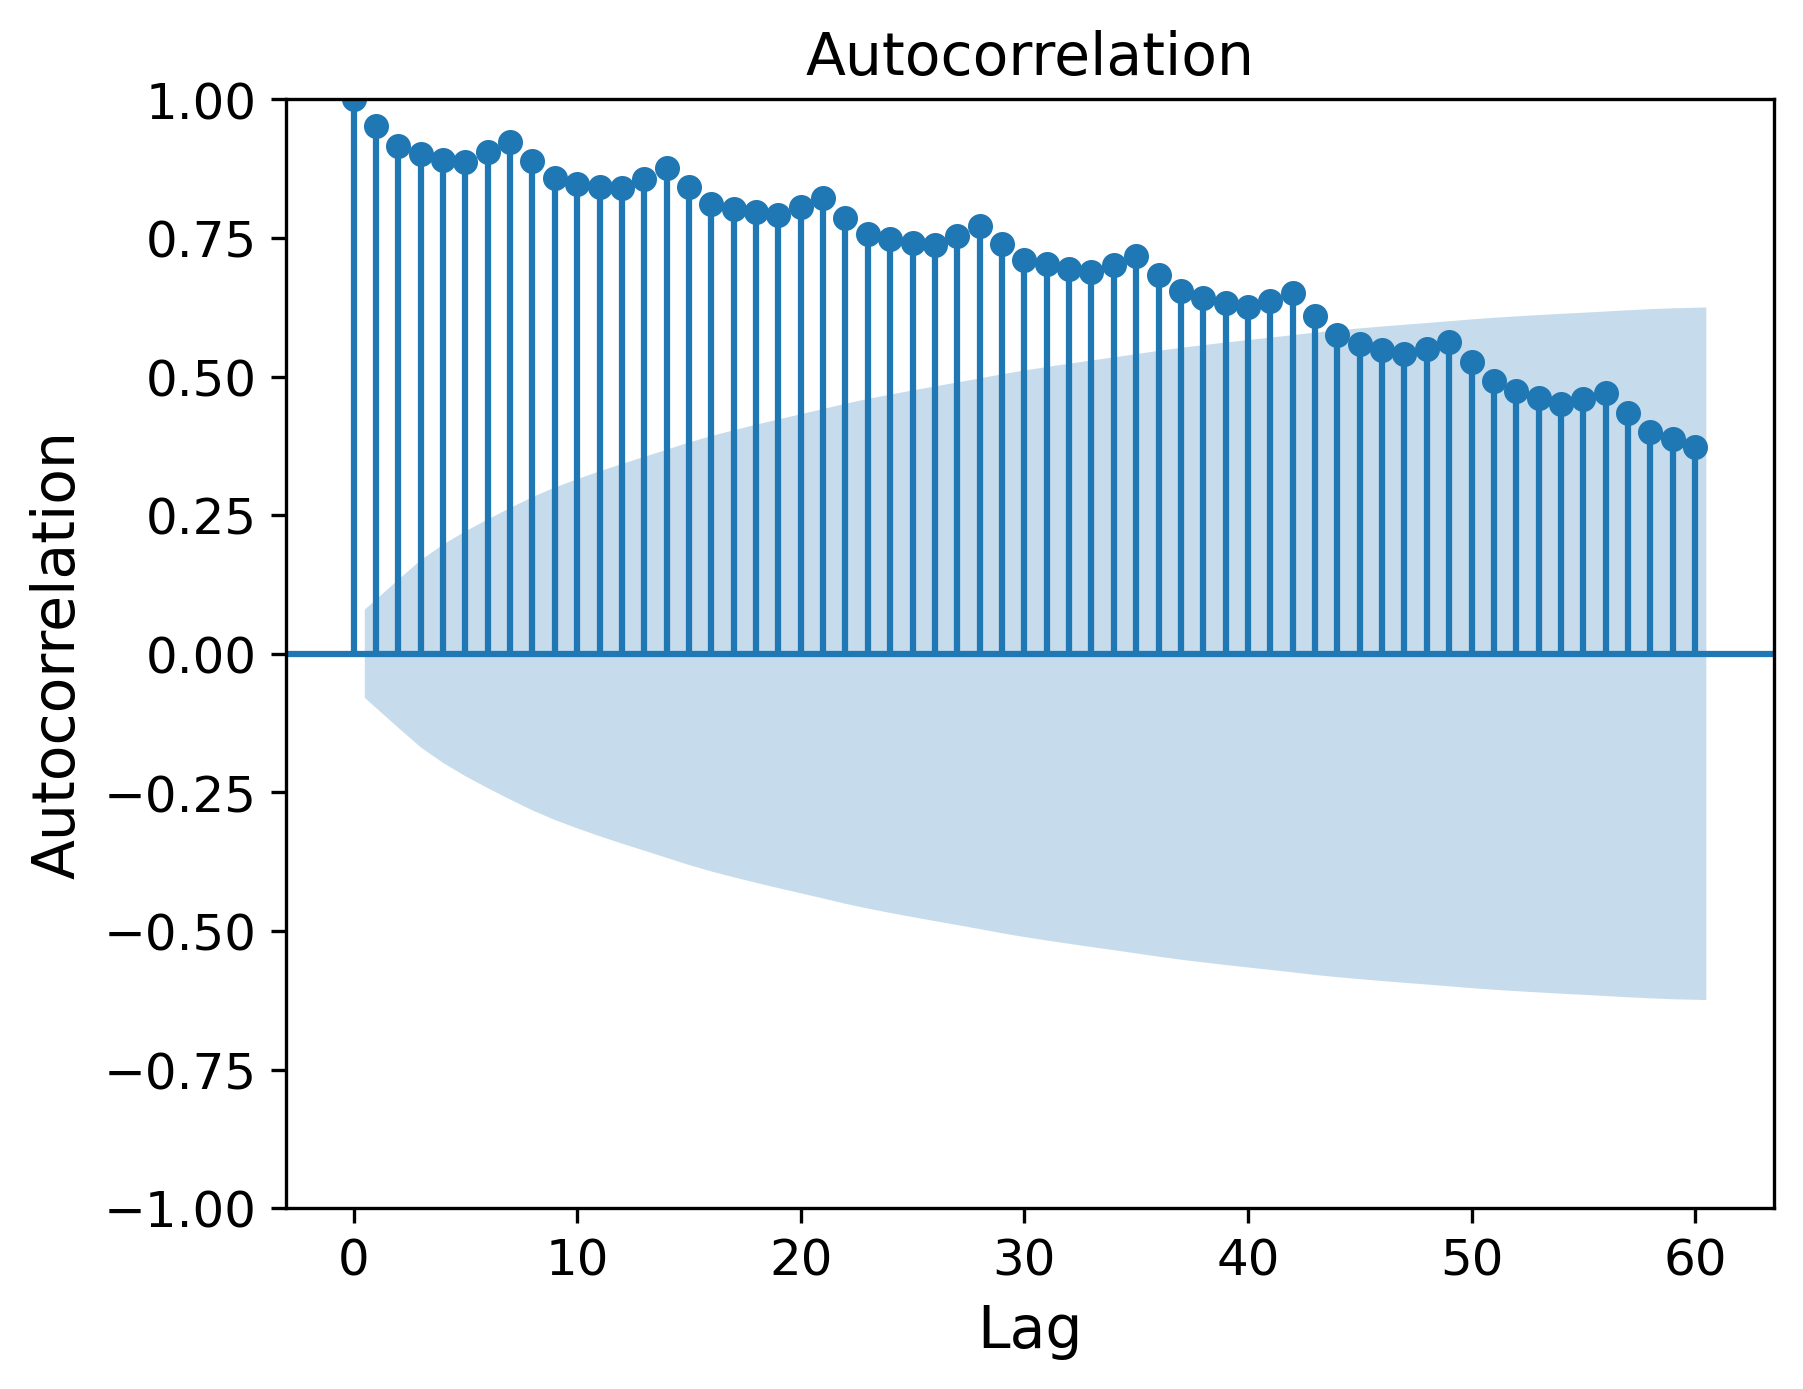

In [34]:
# Plot autocorrelation
plt.figure(figsize=(12, 6))
plot_acf(energy_sum_ts, lags=60)
# plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
# plt.grid(True)
plt.show()


<Figure size 3600x1200 with 0 Axes>

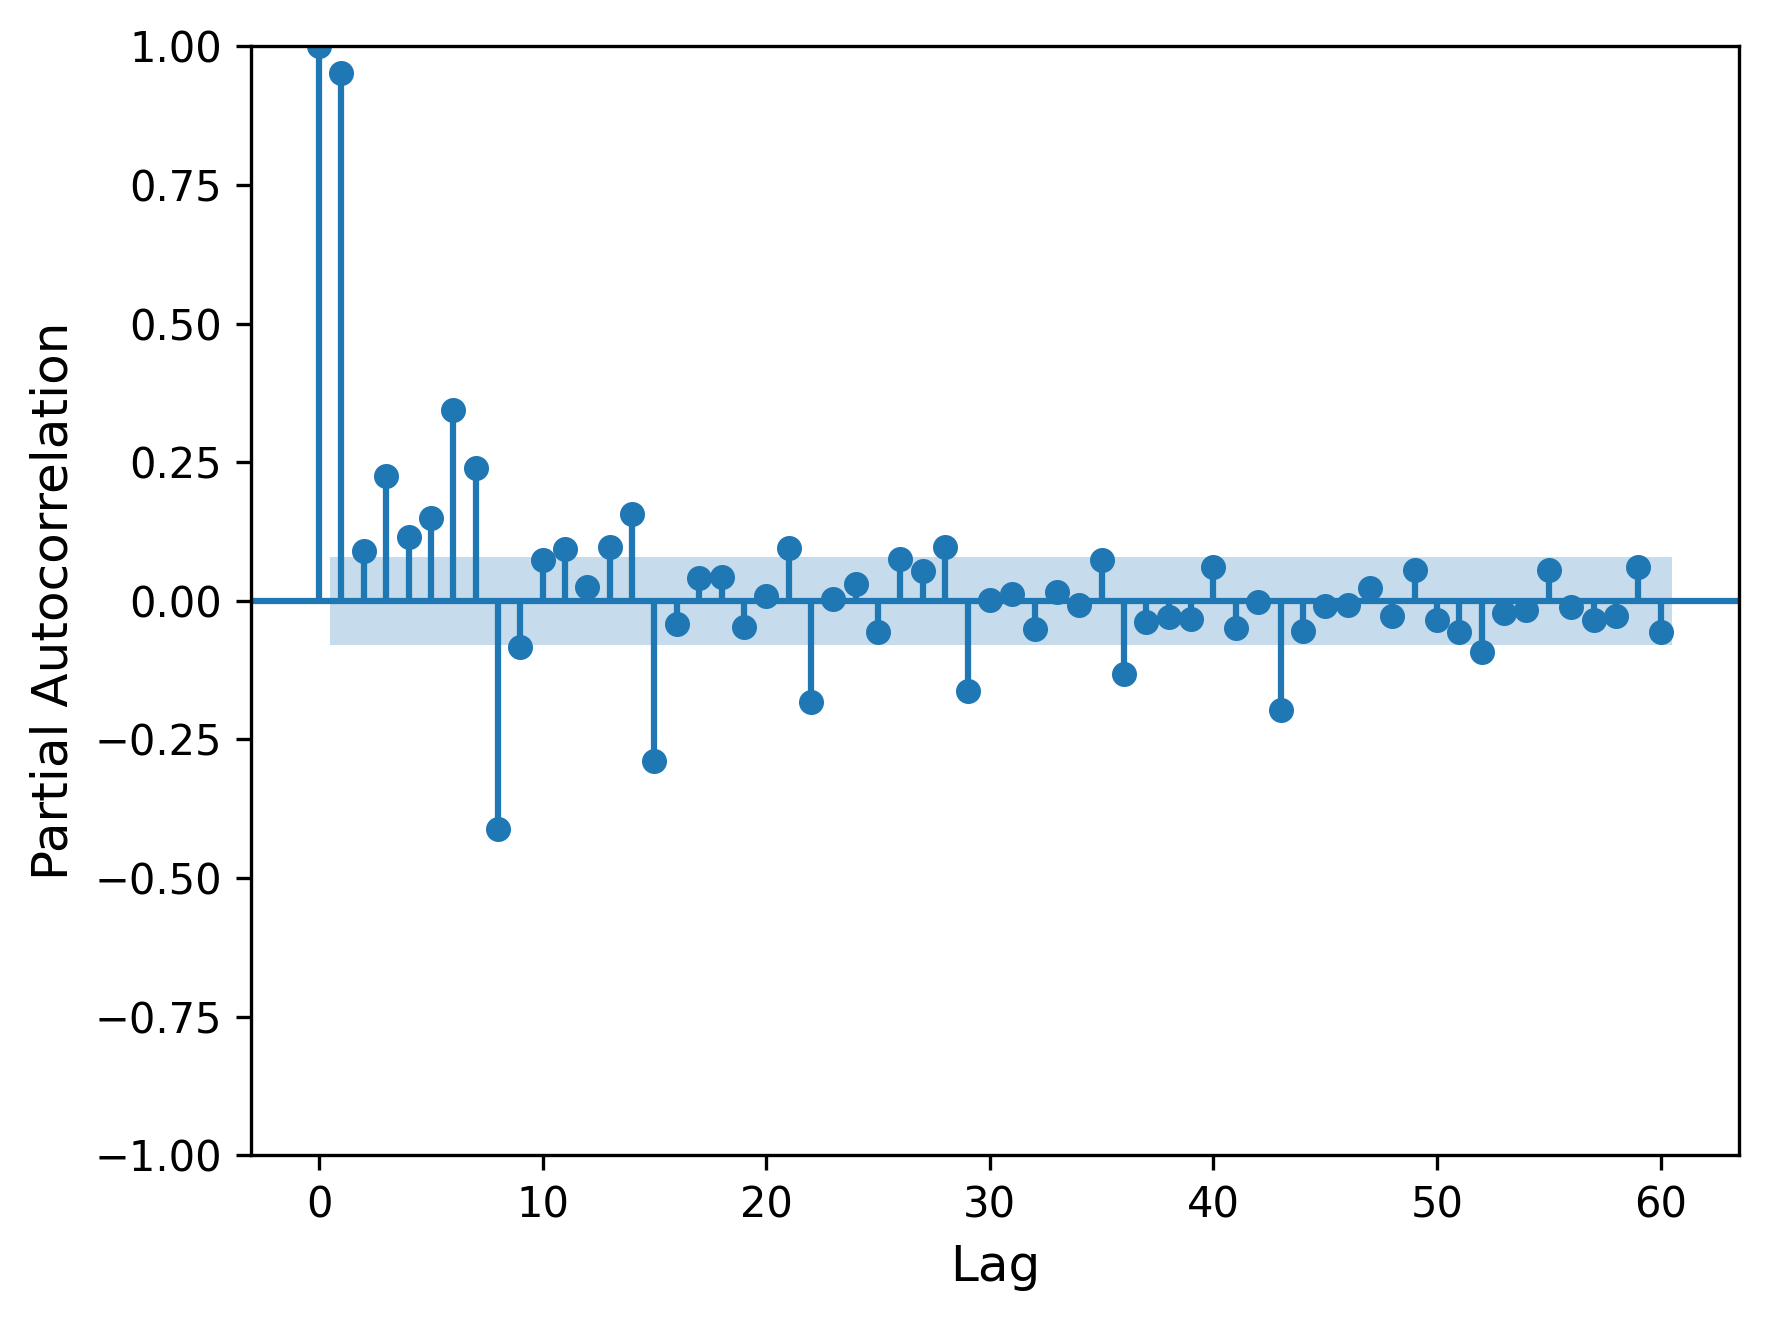

In [6]:
# Plot partial autocorrelation
plt.figure(figsize=(12, 4))
plot_pacf(energy_sum_ts, lags=60, color = 'tab:blue', title=None)
# plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
# plt.grid(True)
plt.savefig('partial_autocorrelation.pdf', format='pdf', bbox_inches='tight')
plt.show()


In [10]:
daily_aggregated= df.groupby('day')[['energy_sum', 'temperature_avg','dewPoint']].mean().reset_index()


/home/ava_mohammadi/.local/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/home/ava_mohammadi/.local/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


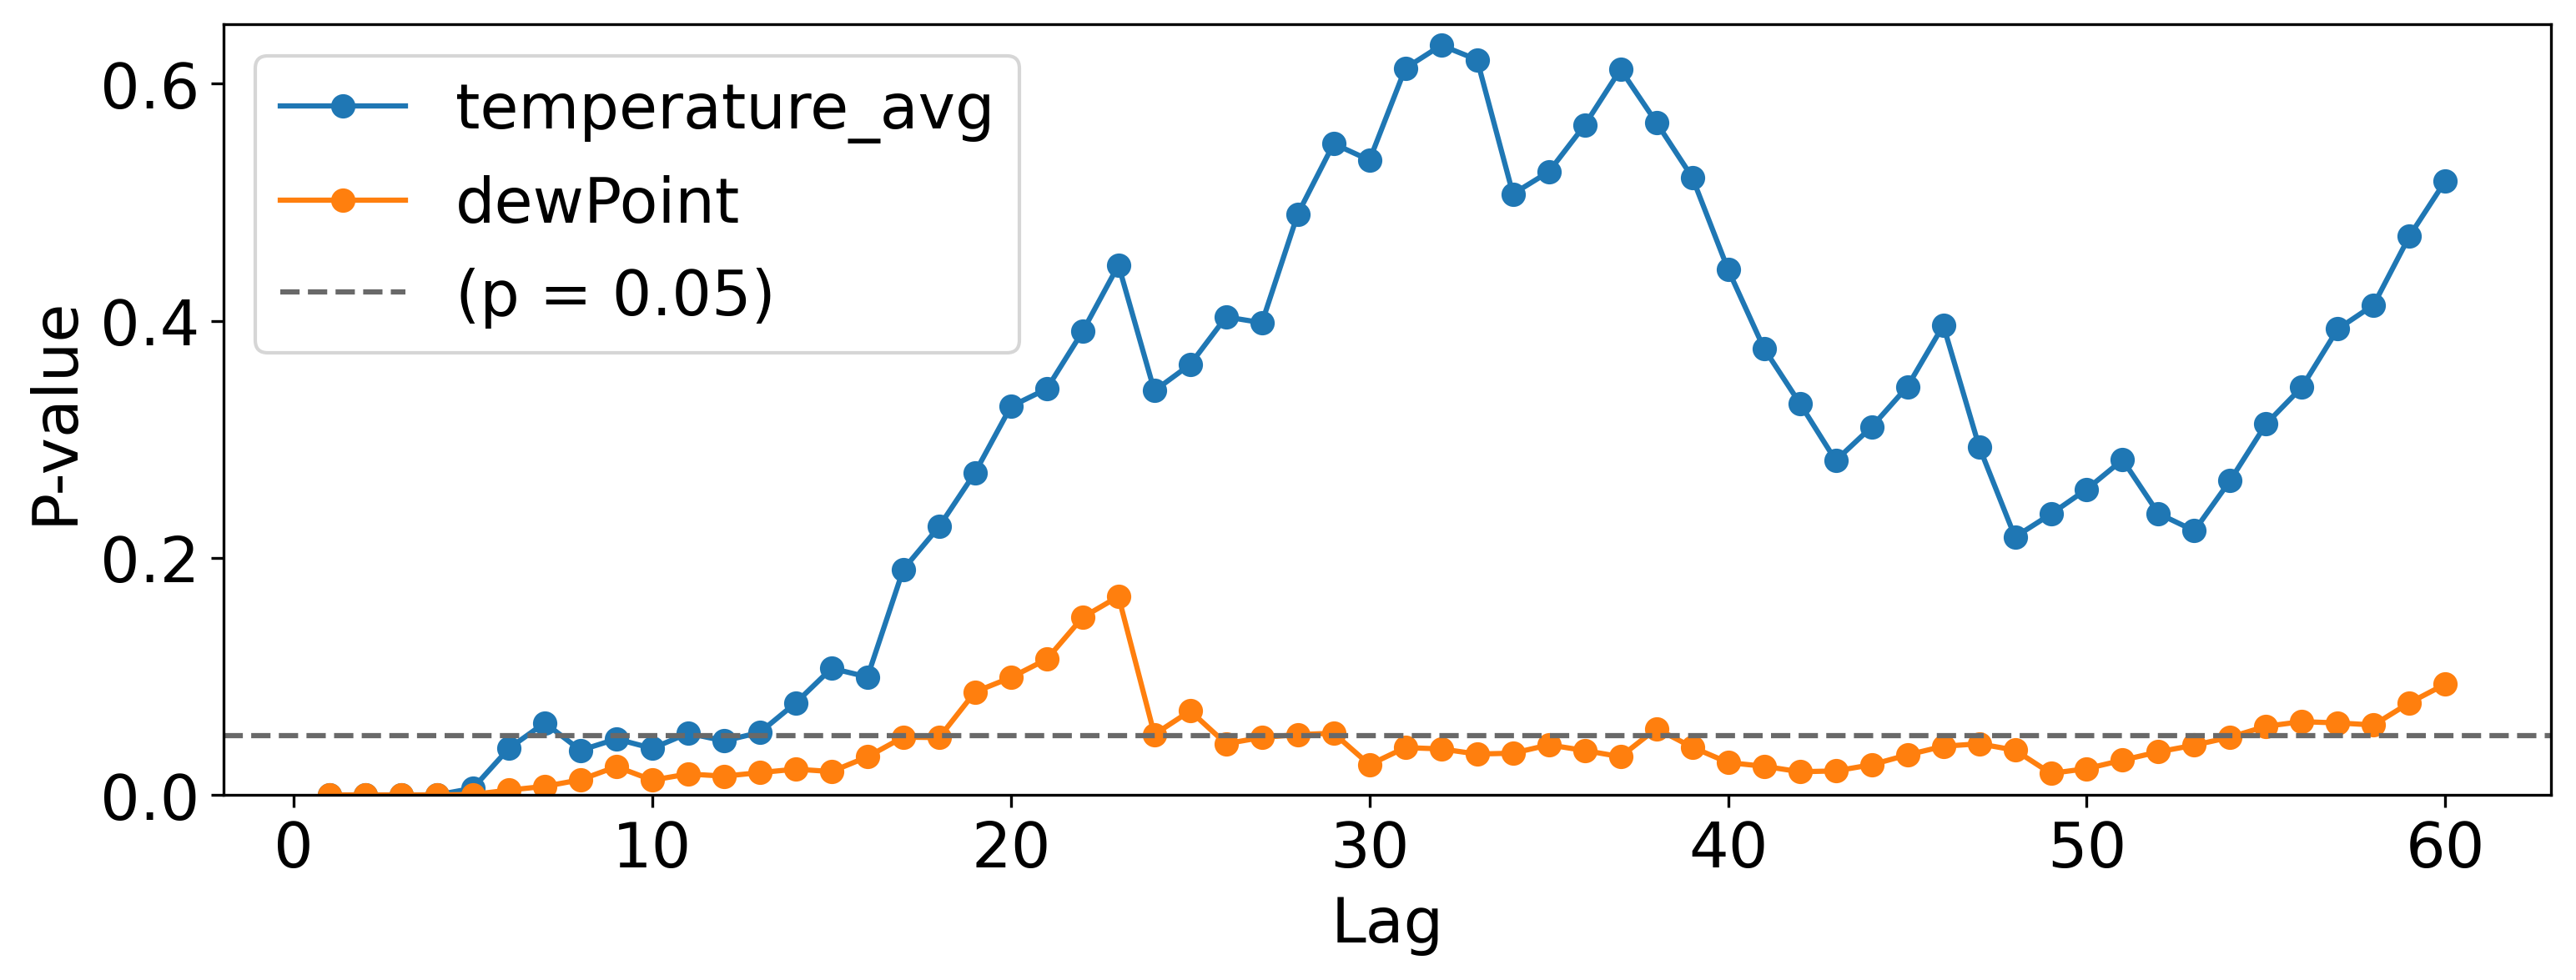

In [14]:

Y = daily_aggregated['energy_sum'] 
X_variables = ['temperature_avg', 'dewPoint'] 

# Perform Granger causality test for each predictor
max_lag = 60# Maximum lag to consider
p_values = {} 
for X_var in X_variables:
    temp_df = daily_aggregated[[X_var, 'energy_sum']]
    
    # Perform Granger causality test
    granger_results = grangercausalitytests(temp_df, max_lag, verbose=False)
    
    # Extract p-values from the test results
    p_values[X_var] = [granger_results[i+1][0]['ssr_ftest'][1] for i in range(max_lag)]

# Plot p-values against lag for each predictor
plt.figure(figsize=(12, 4))
for X_var, p_vals in p_values.items():
    plt.plot(range(1, max_lag + 1), p_vals, marker='o', linestyle='-', label=X_var)


plt.axhline(y=0.05, color='dimgray', linestyle='--', label='(p = 0.05)')

# Adjust y-axis to focus on a specific range of p-values
plt.ylim(0, 0.65) 

# plt.title('Granger Causality Test')
plt.xlabel('Lag')
plt.ylabel('P-value')
plt.legend()
plt.savefig('granger_causality.pdf', format='pdf', bbox_inches='tight')
plt.show()
